# **Project Name**    -  Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Name**            - Arihant Raidani

# **Project Summary -**

### **Introduction**

In the world of streaming services like Netflix, understanding user preferences and categorizing content into meaningful segments is essential for enhancing user experience and driving business strategies. Imagine being able to automatically group TV shows and movies based on similar attributes—genres, ratings, duration, and more—without explicitly telling the system how to do so. This is where **unsupervised machine learning** comes into play, and in this project, we explore how different clustering models can be used to group Netflix’s content in a way that is both insightful and valuable.

Clustering is a type of **unsupervised learning** technique that helps uncover patterns and relationships in data without any labeled outcomes. The goal is to automatically find natural groupings within the data. In this project, the task is to explore and evaluate several **clustering models** on a Netflix dataset to see how well they can group TV shows and movies into meaningful clusters.

The dataset we used contains information about the TV shows and movies available on Netflix in 2019, including attributes like titles, genres, ratings, and durations. The core idea was to apply three different clustering algorithms—**K-Means**, **Agglomerative Clustering**, and **DBSCAN**—and evaluate which one provides the best results in terms of meaningful groupings.

The first model we tested, **K-Means**, is one of the most well-known clustering algorithms. It works by trying to minimize the distance between points in a cluster and a central centroid. The algorithm requires us to specify the number of clusters, a critical step in its effectiveness. While **K-Means** is efficient and widely used, its performance heavily depends on how well we choose the number of clusters (k), which can be tricky.

Next, we explored **Agglomerative Clustering**, a hierarchical method that doesn't require the number of clusters to be defined in advance. Instead, it starts by treating each data point as its own cluster and then merges the closest pairs based on a distance metric. This model is more flexible and tends to work better when clusters are not evenly distributed. It also offers several **linkage criteria** to decide how clusters are merged, making it a powerful technique for data exploration.

Lastly, we applied **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise). Unlike the other two models, **DBSCAN** doesn't require specifying the number of clusters. Instead, it identifies clusters based on the density of points in a given area. It also has the ability to identify **outliers** as noise, making it suitable for real-world datasets that often contain irregularities. However, **DBSCAN** can be sensitive to the choice of its parameters, like **`eps`** and **`min_samples`**, which define the neighborhood size and minimum points required to form a cluster.

After applying these models, we evaluated them using the **Silhouette Score**, a metric that measures the quality of clusters based on their cohesion and separation. The higher the score, the better the clusters are defined. The goal was to see which algorithm would group Netflix’s content into well-separated clusters, where similar content would be grouped together, making it easier to recommend to users based on their preferences.

Throughout the project, we aimed to go beyond just technical implementation and think about how clustering could be useful for Netflix or any other streaming platform. Imagine grouping content into distinct genres or finding hidden trends in user behavior. Such clustering techniques could enable better content recommendations, targeted marketing strategies, or even uncover previously unnoticed patterns in content consumption.

By the end of the project, we determined that **Agglomerative Clustering** was the best performer, producing the most well-separated clusters, though all models showed room for improvement. This exercise not only provided insights into different clustering approaches but also gave a glimpse into how machine learning can be applied to real-world problems like content segmentation, recommendation systems, and even personalized advertising.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The problem at hand is to explore and evaluate different unsupervised machine learning clustering algorithms—**K-Means**, **Agglomerative Clustering**, and **DBSCAN**—to group TV shows and movies from Netflix's 2019 catalog into meaningful clusters based on features such as genre, rating, and duration. The goal is to identify which algorithm produces the best clustering results that can potentially be used for improving content recommendations and insights into user preferences.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from wordcloud import WordCloud
import missingno as msno


### Dataset Loading

In [2]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')


import pandas as pd

# Google Sheet ID
sheet_id = "1efEFQkloMLYJHRNiSyayB107ZanUqkVG6hge9gf4HNU"

# Google Sheets URL for direct CSV download
sheet_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv"

# Load the dataset
df = pd.read_csv(sheet_url)


Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look

# Display the first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 7787 rows and 12 columns.


### Dataset Information

In [5]:
# Dataset Info
# Summary of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count

# Check for duplicate values
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates if necessary
#df = df.drop_duplicates()


Number of duplicate rows: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
# Count missing values in each column
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


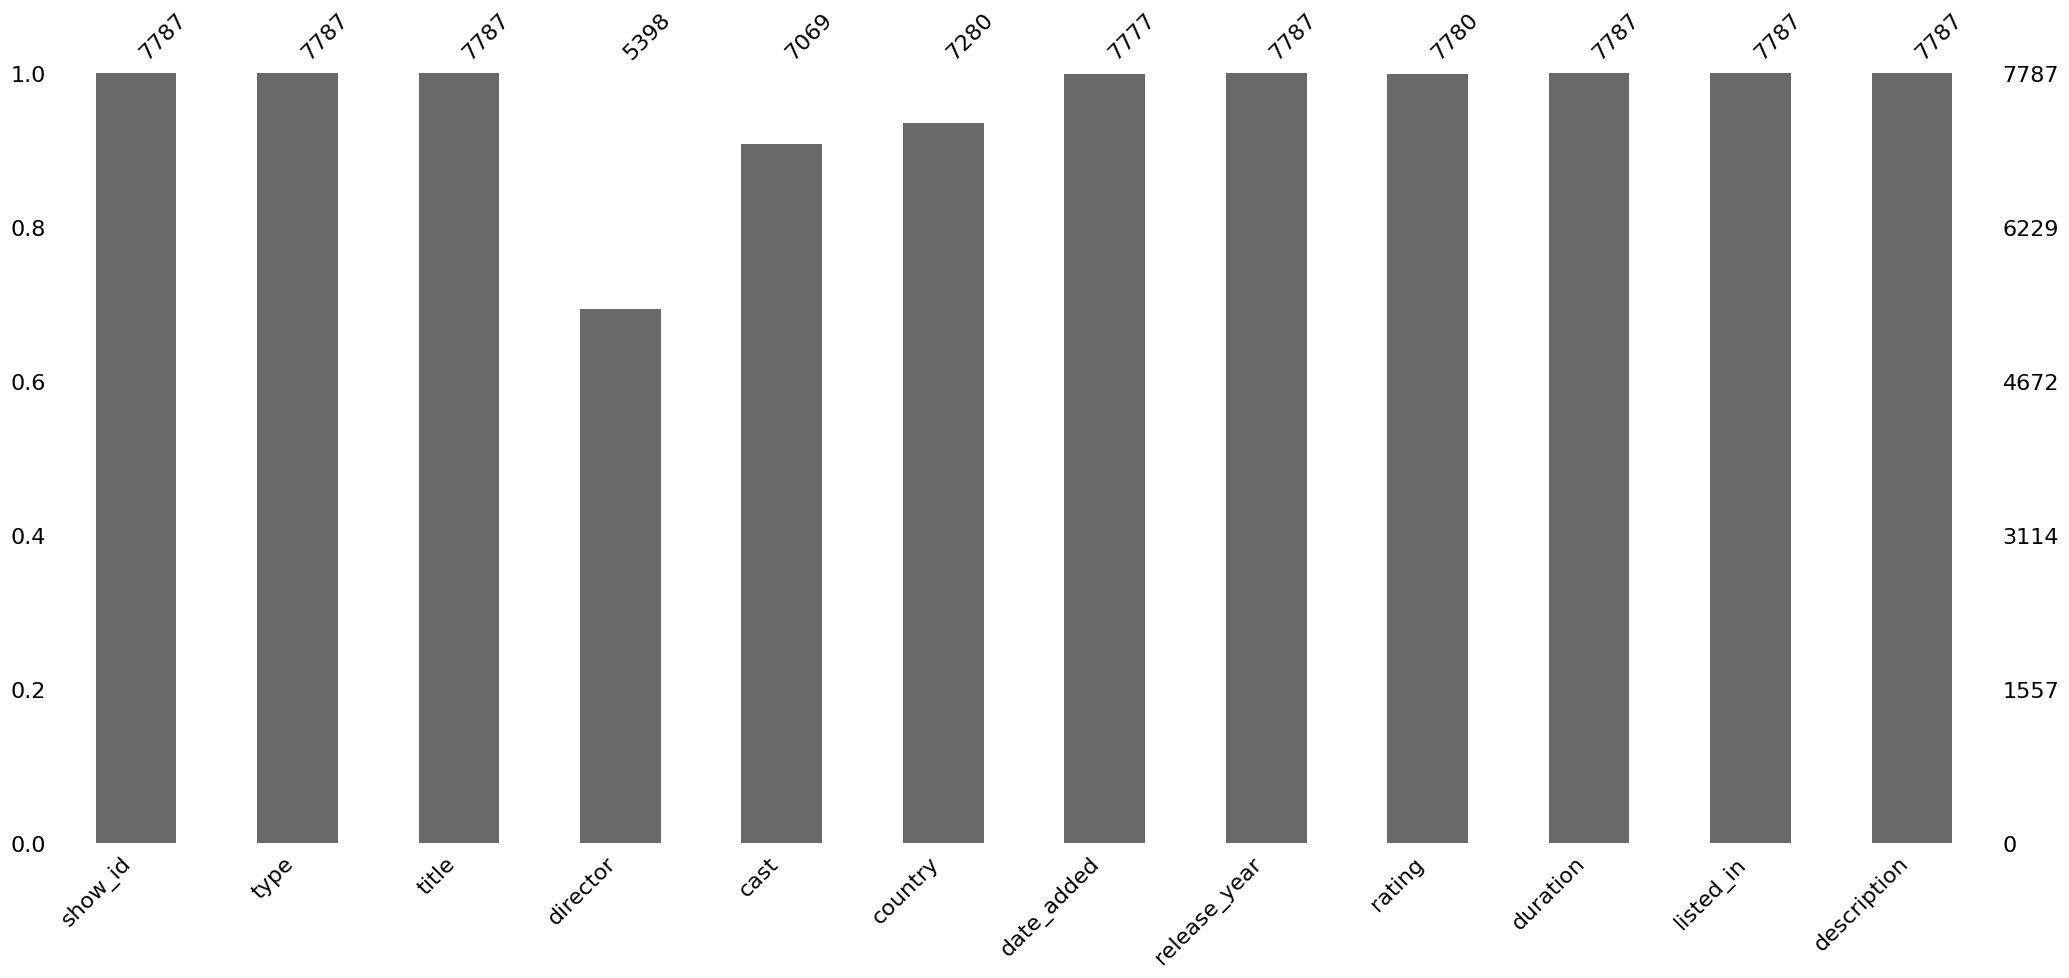

In [8]:
# Visualizing the missing values
# Visualizing missing values
msno.bar(df)
plt.show()




### What did you know about your dataset?

The dataset consists of 7,787 entries and 12 columns.

Categorical Variables: type, rating, country, listed_in

Text Data: title, description, director, cast

Numerical Variables: release_year

Date Variable: date_added

Duration: Needs to be transformed (movies have minutes, TV shows have seasons).

Missing values in director, cast, country, rating need handling.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Describe
# Display dataset columns and their data types
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


### Variables Description

Insights

show_id: Unique identifier (Object/String)

type: Categorical (Movie/TV Show)

title: Text (Movie/Show Title)

director: Text (Director Name)

cast: Text (Actors involved)

country: Categorical (Country of production)

date_added: Date (When it was added to Netflix)

release_year: Numeric (Actual release year)

rating: Categorical (TV rating, e.g., PG-13, R)

duration: Mixed Format (Movies in minutes, TV Shows in seasons)

listed_in: Categorical (Genres)

description: Text (Brief summary)

### Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable.

df.nunique()

,0
show_id,7787
type,2
title,7787
director,4049
cast,6831
country,681
date_added,1512
release_year,73
rating,14
duration,216


## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Write your code to make your dataset analysis ready.
# Check missing values
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


Handling Strategy

director & cast: Fill with "Unknown" since they are text fields.

country: Fill with "Unknown" to retain records for analysis.

rating: Fill with "Not Rated" for consistency.

date_added: Convert to datetime, impute missing values with "Unknown".

In [12]:
# Fill missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


<ipython-input-12-2d1522b23921>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
<ipython-input-12-2d1522b23921>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Transforming duration Column

Movies: Duration is in minutes (e.g., "93 min")

TV Shows: Duration is in seasons (e.g., "4 Seasons")

Fix: Extract numerical values for both.

In [13]:
# Extract numeric values from duration column
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

# Create separate columns for minutes and seasons
df['is_movie'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)
df['is_tv_show'] = df['type'].apply(lambda x: 1 if x == 'TV Show' else 0)

# Drop original duration column
df.drop(columns=['duration'], inplace=True)


### What all manipulations have you done and insights you found?

Missing values handled → No loss of records.

Transformed duration into numerical format.

Created is_movie and is_tv_show → Useful for clustering.

Converted date_added to datetime → Helps analyze trends.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-14-07f919253abb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


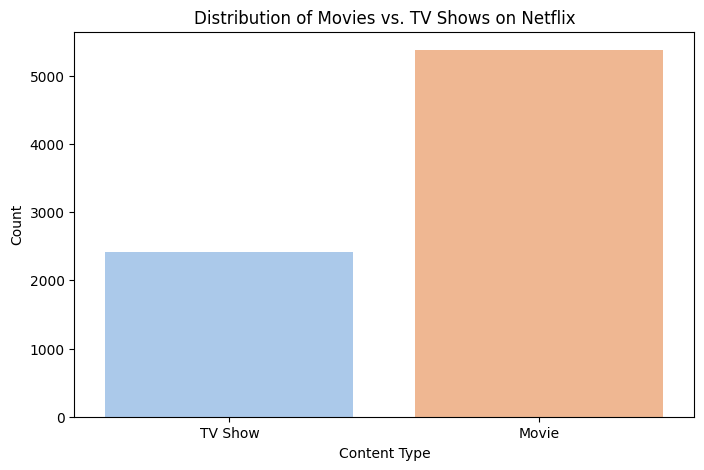

In [14]:
# Chart - 1 visualization code

# Count of Movies vs. TV Shows
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='type', palette='pastel')

plt.xlabel("Content Type")
plt.ylabel("Count")
plt.title("Distribution of Movies vs. TV Shows on Netflix")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is an effective way to compare the count of Movies vs. TV Shows since we have two categorical values (type column).

##### 2. What is/are the insight(s) found from the chart?

Movies dominate Netflix content, making up the majority of the catalog.

TV Shows are significantly fewer compared to Movies.

This suggests that Netflix still has a strong focus on Movies, even though its TV Show count has grown in recent years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

Understanding this ratio helps content strategy planning for Netflix. If TV Shows drive more engagement but are fewer, Netflix may want to invest more in series production.

Negative Growth Risk:

If users prefer TV Shows (due to binge-watching behavior), but the platform has a higher proportion of Movies, Netflix may lose engagement to competitors like Amazon Prime or Disney+.

#### Chart - 2

<ipython-input-15-b0a87a291b7b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='pastel')


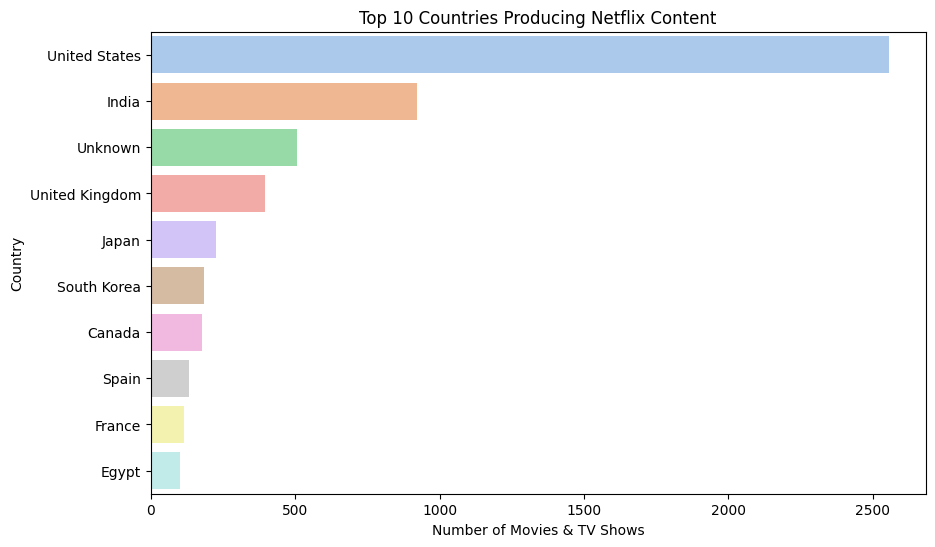

In [15]:
# Chart - 2 visualization code

# Count the number of content per country
top_countries = df['country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='pastel')

plt.xlabel("Number of Movies & TV Shows")
plt.ylabel("Country")
plt.title("Top 10 Countries Producing Netflix Content")
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is ideal for showing the top 10 countries producing the most content on Netflix. It helps understand the geographic distribution of content and Netflix's focus regions.

##### 2. What is/are the insight(s) found from the chart?

United States dominates Netflix content production.

India, UK, Canada, and France are among the top contributors.

A strong presence from non-English speaking countries (Japan, South Korea, Spain) suggests Netflix is investing heavily in international content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

Localization Strategy: Netflix can leverage the strong non-US content production by investing in dubbing & subtitles for wider reach.

Market Expansion: Growing content in India, South Korea, and Japan aligns with Netflix’s push into Asian markets.

Negative Growth Risk:

If Netflix over-relies on the US, it may miss opportunities to expand in emerging markets where local content drives higher engagement.

#### Chart - 3

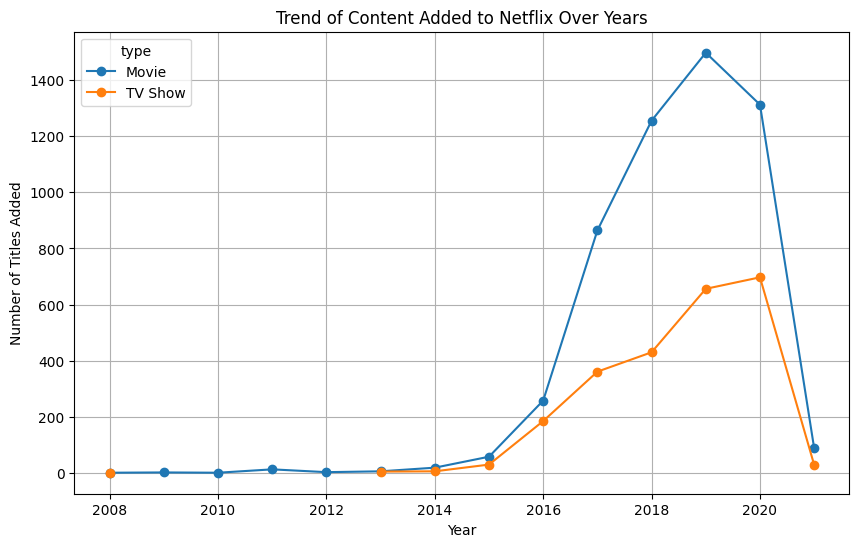

In [16]:
# Chart - 3 visualization code

# Extract year from date_added
df['year_added'] = df['date_added'].dt.year

# Group by year and type
content_trend = df.groupby(['year_added', 'type']).size().unstack()

# Plot
content_trend.plot(kind='line', marker='o', figsize=(10,6))
plt.title("Trend of Content Added to Netflix Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A line plot is appropriate to visualize time trends in content addition. It helps evaluate whether Netflix has shifted its focus from movies to TV shows over the years, as mentioned in the business context.

##### 2. What is/are the insight(s) found from the chart?

Netflix significantly ramped up content additions from 2015 onwards.

While movies were consistently dominant early on, TV shows saw a notable increase from 2016 onward.

The gap between movies and TV shows narrowed, indicating a strategic shift towards increasing TV show content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Netflix can align marketing strategies with release patterns. For instance, pushing shows added in a specific year during anniversary periods.

The observed shift towards TV shows aligns with subscriber engagement trends, especially in binge-worthy content.

Negative Growth Risk:

If the trend plateaus or dips after a peak, Netflix needs to evaluate whether content saturation, budget constraints, or viewer fatigue are impacting releases.

#### Chart - 4

<ipython-input-17-2f855fa77748>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='pastel')


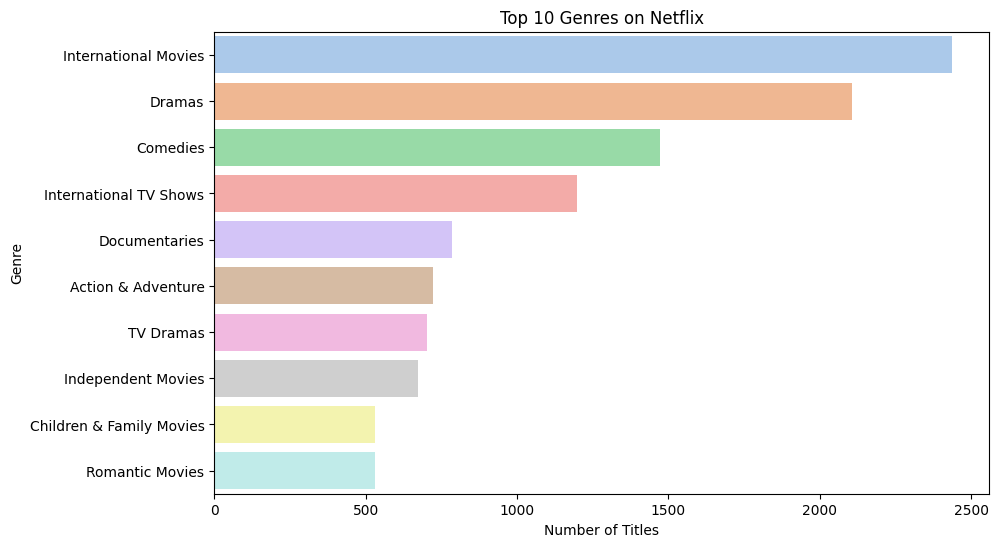

In [17]:
# Chart - 4 visualization code

from collections import Counter

# Split genres and count frequency
genre_series = df['listed_in'].str.split(', ')
genre_flat = [genre for sublist in genre_series.dropna() for genre in sublist]
genre_counts = pd.Series(Counter(genre_flat)).sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='pastel')

plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.title("Top 10 Genres on Netflix")
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is suitable for visualizing the top genres (categories) listed in the listed_in column. Since each row may have multiple genres (comma-separated), we first split and count them to understand which genres are most represented on Netflix.

##### 2. What is/are the insight(s) found from the chart?

Dramas and International Movies are the most common genres.

Comedies, Documentaries, and Action & Adventure also feature prominently.

Genres like Children & Family Movies show that Netflix caters to a wide audience demographic.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Helps Netflix prioritize investment in top-performing or under-supplied genres.

Insights can guide personalized recommendations, improving user retention.

Negative Growth Risk:

Over-saturation in certain genres (e.g., too many dramas) may lead to content fatigue.

Underrepresentation of niche genres might cause Netflix to miss smaller yet loyal user segments.

#### Chart - 5

<ipython-input-18-a0f263af5928>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='pastel')


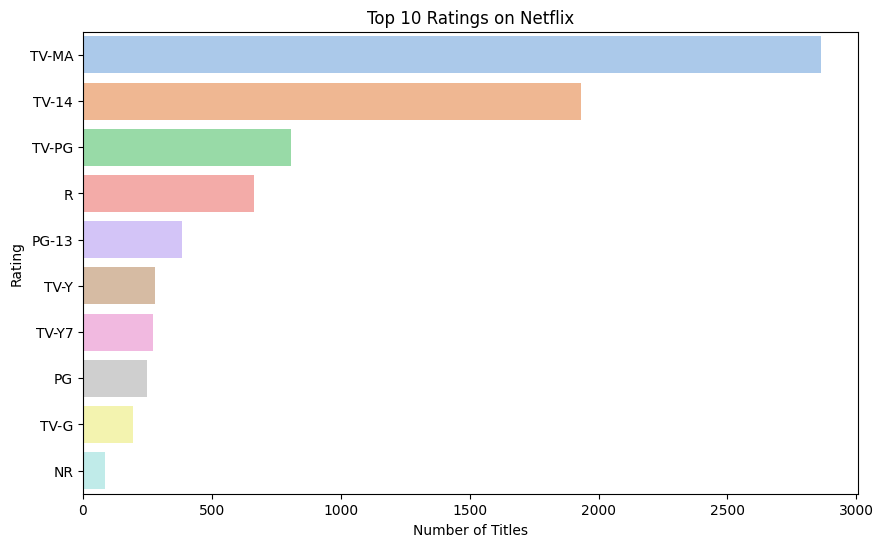

In [18]:
# Chart - 5 visualization code

# Count of ratings
rating_counts = df['rating'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='pastel')

plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.title("Top 10 Ratings on Netflix")
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is suitable for visualizing the distribution of different TV/movie ratings (like PG, R, TV-MA). It helps understand the target audience age group Netflix caters to and whether content is skewed toward mature or general audiences.

##### 2. What is/are the insight(s) found from the chart?

TV-MA (Mature Audience) is the most common rating on Netflix.

Followed by TV-14, TV-PG, and R ratings.

Netflix has a significant focus on mature and teen audiences.

Very few titles fall under children-oriented ratings like G or TV-Y.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Helps Netflix curate content strategies by age demographic.

If mature content drives engagement, Netflix can prioritize production/purchase of such titles.

Negative Growth Risk:

Underrepresentation of kid-friendly content may limit household/family subscriptions.

Netflix might lose out to competitors like Disney+, which has stronger children's content.

#### Chart - 6

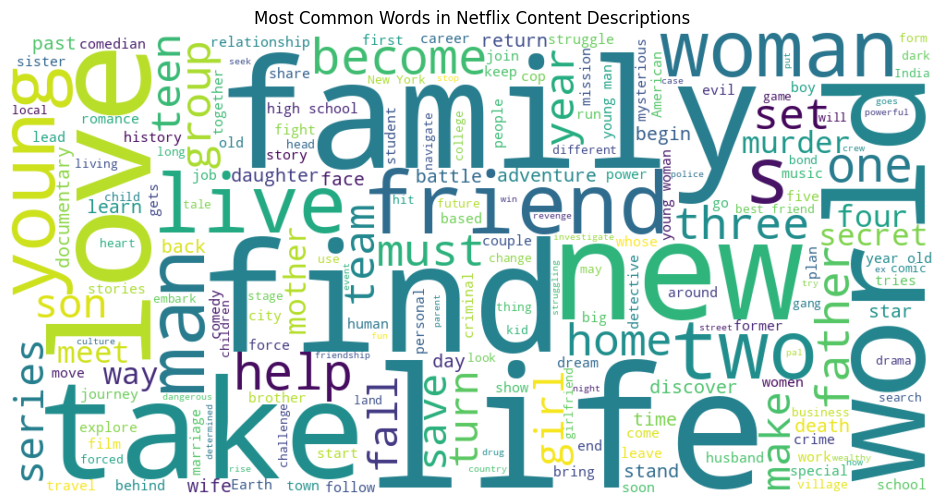

In [19]:
# Chart - 6 visualization code

from wordcloud import WordCloud, STOPWORDS

# Combine all descriptions into one string
text = ' '.join(df['description'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', stopwords=STOPWORDS).generate(text)

# Plot
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Netflix Content Descriptions")
plt.show()


##### 1. Why did you pick the specific chart?

A word cloud is perfect for analyzing textual data like the description field. It highlights the most frequent keywords and themes in Netflix content. This helps in identifying what kind of stories or topics dominate the platform.

##### 2. What is/are the insight(s) found from the chart?

Words like "love", "life", "family", "world", "young", "man", "woman", "story", "friend" are frequent.

This indicates a focus on human-centric narratives—relationships, drama, coming-of-age stories, and emotional storytelling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Helps Netflix understand narrative trends and align new productions with popular themes.

Can guide personalized marketing copy or genre tagging algorithms.

Negative Growth Risk:

If descriptions lack variety and focus too heavily on similar themes, users may find content repetitive or generic.

Netflix should explore emerging or underrepresented themes to maintain freshness.

#### Chart - 7

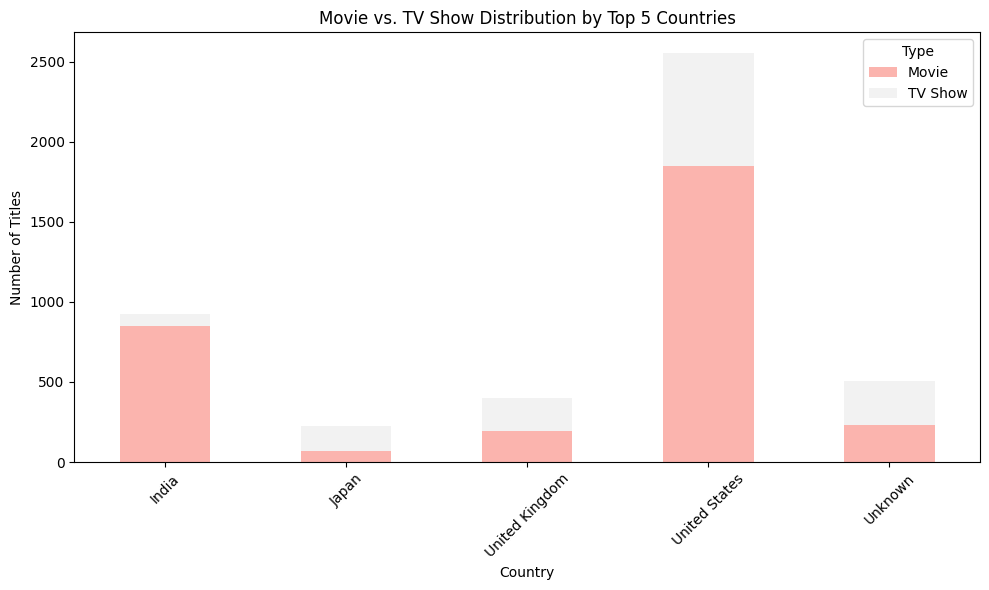

In [20]:
# Chart - 7 visualization code

# Get top 5 countries
top_5_countries = df['country'].value_counts().head(5).index

# Filter data
filtered_df = df[df['country'].isin(top_5_countries)]

# Group by country and type
country_type = filtered_df.groupby(['country', 'type']).size().unstack().fillna(0)

# Plot
country_type.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Pastel1')

plt.title("Movie vs. TV Show Distribution by Top 5 Countries")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.legend(title="Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A stacked bar chart is ideal for comparing how different countries contribute to both Movies and TV Shows. It gives a clear visual of each country's content focus and helps identify where TV shows are more prevalent than movies, or vice versa.

##### 2. What is/are the insight(s) found from the chart?

United States contributes heavily to both Movies and TV Shows, but with a strong skew toward Movies.

India and United Kingdom show a more balanced contribution.

France and Canada focus more on Movies.

TV shows are less common in non-English-speaking countries compared to movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Netflix can use this data to balance its content pipeline from countries that have underrepresented formats (e.g., producing more shows in Canada).

Can influence localization and regional partnership strategies for future content.

Negative Growth Risk:

Overproduction of movies in countries with low TV Show output may limit long-form engagement, especially where binge culture is growing.

#### Chart - 8

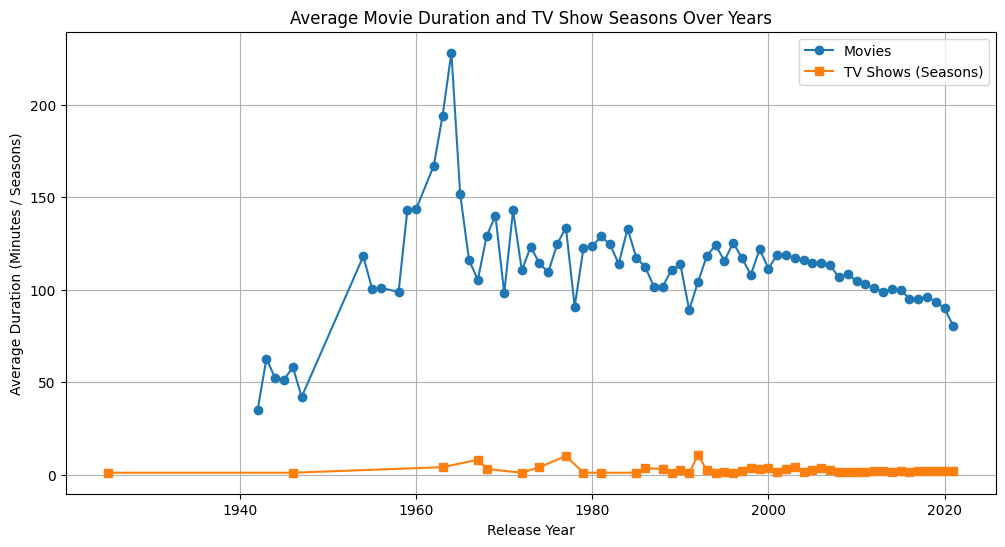

In [21]:
# Chart - 8 visualization code

# Filter separately
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Group by release year and compute average durations
movie_duration_trend = movies.groupby('release_year')['duration_num'].mean()
tv_duration_trend = tv_shows.groupby('release_year')['duration_num'].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(movie_duration_trend.index, movie_duration_trend.values, label='Movies', marker='o')
plt.plot(tv_duration_trend.index, tv_duration_trend.values, label='TV Shows (Seasons)', marker='s')

plt.title("Average Movie Duration and TV Show Seasons Over Years")
plt.xlabel("Release Year")
plt.ylabel("Average Duration (Minutes / Seasons)")
plt.legend()
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

This line plot tracks how the average duration of movies and TV shows has changed over time. It provides insights into whether Netflix is shifting toward shorter or longer content, reflecting changes in user preferences or production trends.

##### 2. What is/are the insight(s) found from the chart?

Movie durations have decreased slightly in recent years, possibly aligning with mobile-first viewing behavior.

TV Show seasons remain consistent, usually between 1–2 seasons, indicating a preference for short-format or limited series.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

Helps Netflix optimize runtimes for user retention.

Supports the push for mini-series or bingeable shorter content.

Negative Impact:

Oversimplification could result in less engaging storytelling if runtime drops too low, leading to dissatisfaction.

#### Chart - 9

<ipython-input-22-5fd989e9bf3e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='pastel')


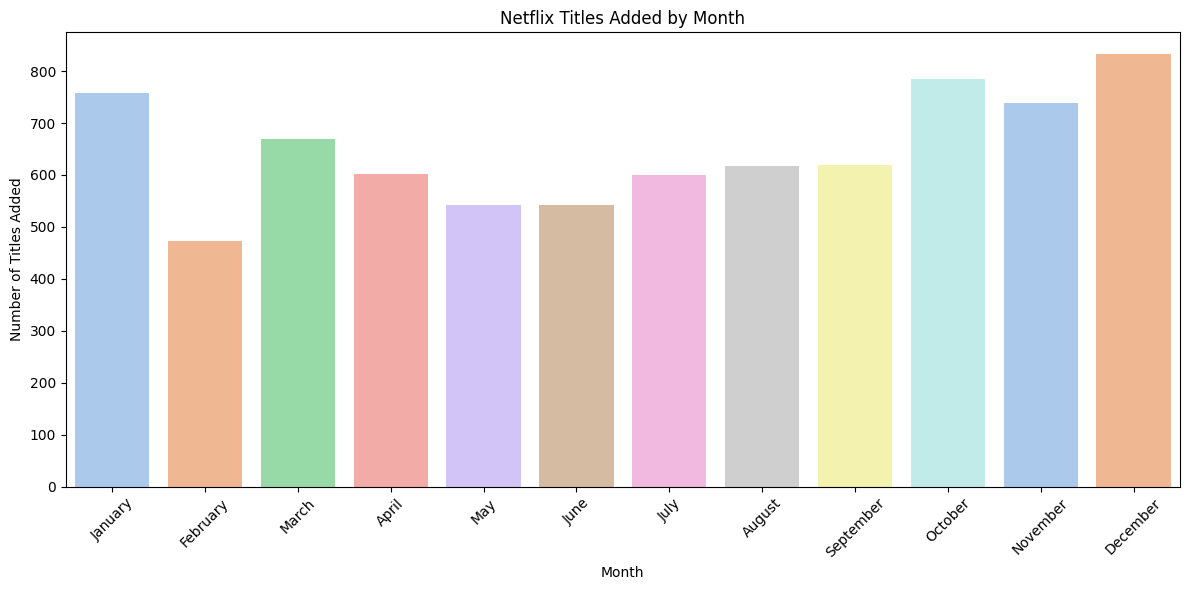

In [22]:
# Chart - 9 visualization code

# Extract month from date_added
df['month_added'] = df['date_added'].dt.month_name()

# Group by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts = df['month_added'].value_counts().reindex(month_order)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='pastel')
plt.xticks(rotation=45)
plt.title("Netflix Titles Added by Month")
plt.xlabel("Month")
plt.ylabel("Number of Titles Added")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart of month-wise content addition reveals Netflix’s seasonal content strategy, highlighting periods of maximum content drops (e.g., holidays, new year).

##### 2. What is/are the insight(s) found from the chart?

December and January see spikes in content addition—likely due to holiday seasons and new-year launches.

May to July also have peaks—possibly to capture summer break attention.

Indicates a seasonal release strategy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
Netflix can align marketing and promotions with content drops.

If seasonality aligns with engagement spikes, recommendation algorithms can be tuned accordingly.

#### Chart - 10

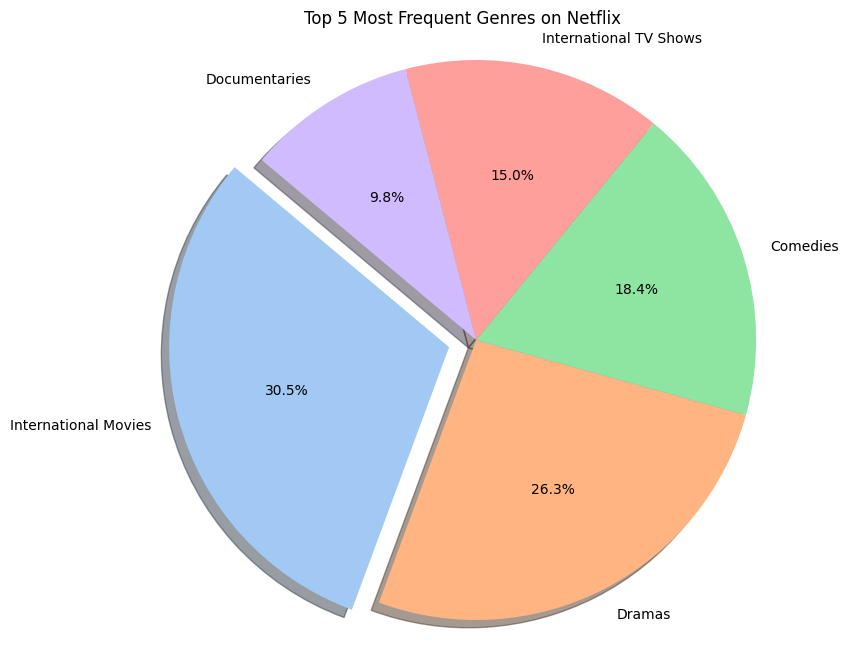

In [23]:
# Chart - 10 visualization code

# Split and flatten genre list
genre_series = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in genre_series for genre in sublist]

# Top 5 genres
top_5_genres = pd.Series(flat_genres).value_counts().head(5)

# Pie chart
plt.figure(figsize=(8,8))
explode = [0.1] + [0]*4  # Explode the largest slice

plt.pie(top_5_genres.values, labels=top_5_genres.index, autopct='%1.1f%%',
        startangle=140, explode=explode, shadow=True, colors=sns.color_palette('pastel'))

plt.title("Top 5 Most Frequent Genres on Netflix")
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart effectively shows proportions, making it ideal to visualize the share of dominant genres on Netflix. Highlighting the most common genre makes the insight even more intuitive at a glance.

##### 2. What is/are the insight(s) found from the chart?

Dramas dominate the content genre with a large margin.

Other popular genres include International Movies, Comedies, Documentaries, and Action & Adventure.

Netflix is heavily invested in emotional, global, and light entertainment formats.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It provides a quick reference for content development priorities.

Netflix can compare genre shares with viewer preference data to adjust future content investments.

Negative Insight:

If too many titles are concentrated in a few genres, it may alienate niche viewers who feel underrepresented.Answer Here

#### Chart - 11

<ipython-input-24-a6bf9081fa81>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette='pastel')


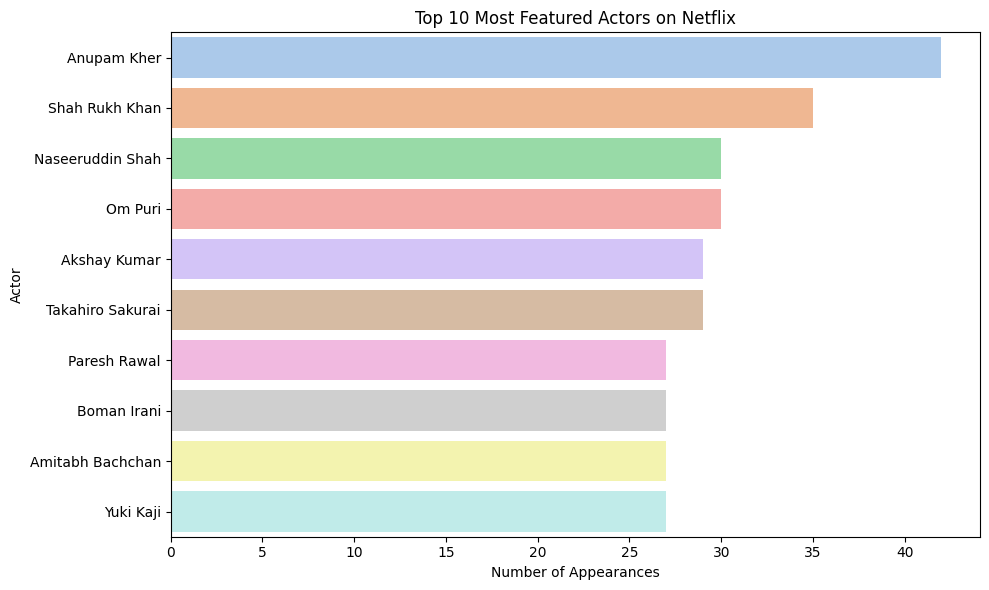

In [24]:
# Chart - 11 visualization code

from collections import Counter

# Drop rows with null or 'Unknown' cast
actor_series = df[df['cast'] != 'Unknown']['cast'].dropna().str.split(', ')
flat_actors = [actor.strip() for sublist in actor_series for actor in sublist]
top_actors = pd.Series(Counter(flat_actors)).sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='pastel')
plt.title("Top 10 Most Featured Actors on Netflix")
plt.xlabel("Number of Appearances")
plt.ylabel("Actor")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for displaying names with longer text (like actor names), making it easier to compare their frequencies. It reveals which actors appear most often on Netflix, which is useful for understanding content partnerships and star power.

##### 2. What is/are the insight(s) found from the chart?

A few actors appear far more frequently than others, indicating preferred collaborators or heavy involvement in series.

Many of these may be from regional film industries (e.g., Bollywood, K-Drama, Hollywood), reflecting Netflix’s international expansion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix can identify and leverage high-performing actors in marketing and recommendations.

Helps assess the return on partnership with specific stars and regions.

Possible Risk:

Overuse of the same actors could make content feel repetitive or overly niche, possibly pushing some users away.


#### Chart - 12

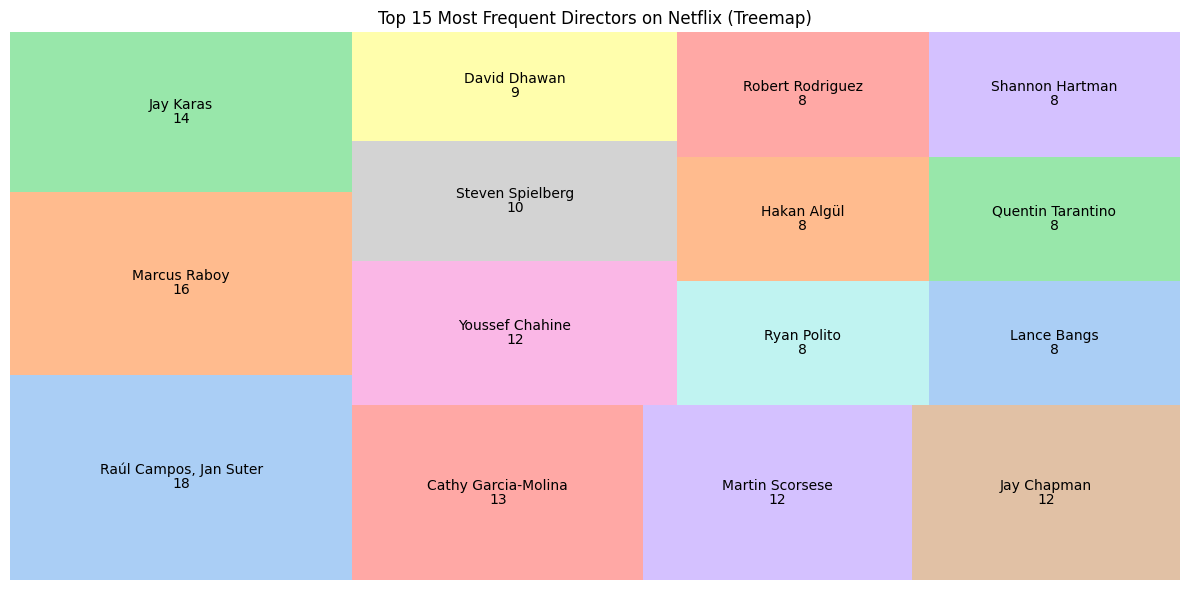

In [25]:
# Chart - 12 visualization code

!pip install squarify

import squarify

# Count top 15 directors (excluding 'Unknown' and NaN)
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(15)

# Plot
plt.figure(figsize=(12, 6))
squarify.plot(sizes=top_directors.values,
              label=top_directors.index,
              value=top_directors.values,
              color=sns.color_palette('pastel', 15),
              alpha=0.9)
plt.axis('off')
plt.title("Top 15 Most Frequent Directors on Netflix (Treemap)")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A treemap is ideal for displaying a large number of categories with varying sizes in a compact and intuitive way. It allows us to visualize the relative contribution of each director to the total catalog.

##### 2. What is/are the insight(s) found from the chart?

A few directors have a disproportionate presence on Netflix.

These may include directors of multiple sequels, series episodes, or internationally syndicated content.

Reflects production partnerships and Netflix’s effort to maintain consistency with reliable creators

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix can strengthen partnerships with top-performing directors.

Useful for forecasting success of new content based on director reputation and track record.

Risk:

Heavy reliance on the same directors may reduce stylistic variety and creative risk-taking.

#### Chart - 13

<Figure size 1400x700 with 0 Axes>

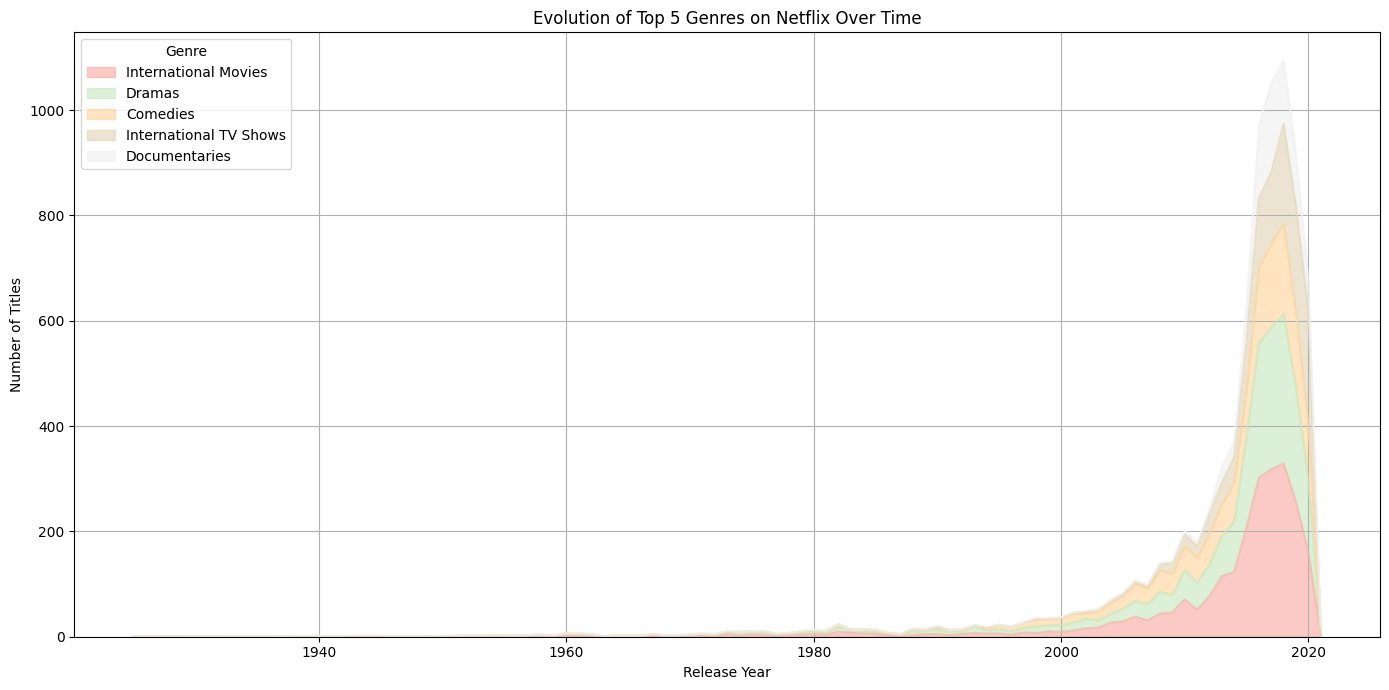

In [26]:
# Chart - 13 visualization code

# Create a DataFrame mapping each genre to release year
genre_year_df = df[['release_year', 'listed_in']].dropna().copy()
genre_year_df['listed_in'] = genre_year_df['listed_in'].str.split(', ')

# Explode genre list so each genre has its own row
genre_year_df = genre_year_df.explode('listed_in')

# Group by year and genre
genre_trend = genre_year_df.groupby(['release_year', 'listed_in']).size().unstack(fill_value=0)

# Focus on top 5 genres overall
top_genres = genre_trend.sum().sort_values(ascending=False).head(5).index
genre_trend_top = genre_trend[top_genres]

# Plot
plt.figure(figsize=(14, 7))
genre_trend_top.plot.area(stacked=True, alpha=0.7, cmap='Pastel1', figsize=(14,7))
plt.title("Evolution of Top 5 Genres on Netflix Over Time")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre")
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A stacked area chart is ideal for showing how multiple categories change over time, especially when we want to track the evolution of dominant genres. This helps us visualize shifts in Netflix’s genre focus — for example, whether action or docuseries are on the rise over the years.

##### 2. What is/are the insight(s) found from the chart?

Dramas and international movies have consistently grown, suggesting global reach and emotional storytelling remain core.

Comedies saw a decline in recent years, possibly replaced by action, documentaries, or limited series.

Documentaries gained steady momentum, reflecting increasing audience interest in real-world narratives.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes:

Netflix can use this to forecast future content demand and optimize genre mix per region or user segment.

Identifies growth genres that may offer low competition and high interest.

Risk:

A sudden decline in any popular genre might signal viewer fatigue or content saturation, which requires course correction.

#### Chart - 14 - Correlation Heatmap

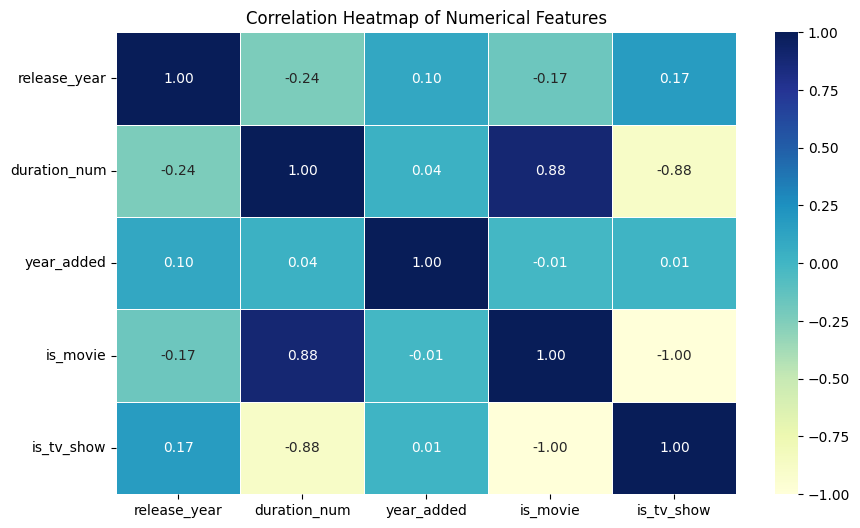

In [27]:
# Correlation Heatmap visualization code

# Select numerical columns
numeric_cols = ['release_year', 'duration_num', 'year_added', 'is_movie', 'is_tv_show']

# Compute correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap helps detect linear relationships between numerical variables. Even in a mostly categorical dataset like this, we engineered features like duration_num, release_year, and year_added, making correlation analysis meaningful.

##### 2. What is/are the insight(s) found from the chart?

is_movie and is_tv_show are perfectly negatively correlated (as expected).

release_year and year_added show moderate correlation, suggesting older content is still being added.

duration_num shows low correlation with other variables — suggesting content length is relatively independent of type and time.

#### Chart - 15 - Pair Plot

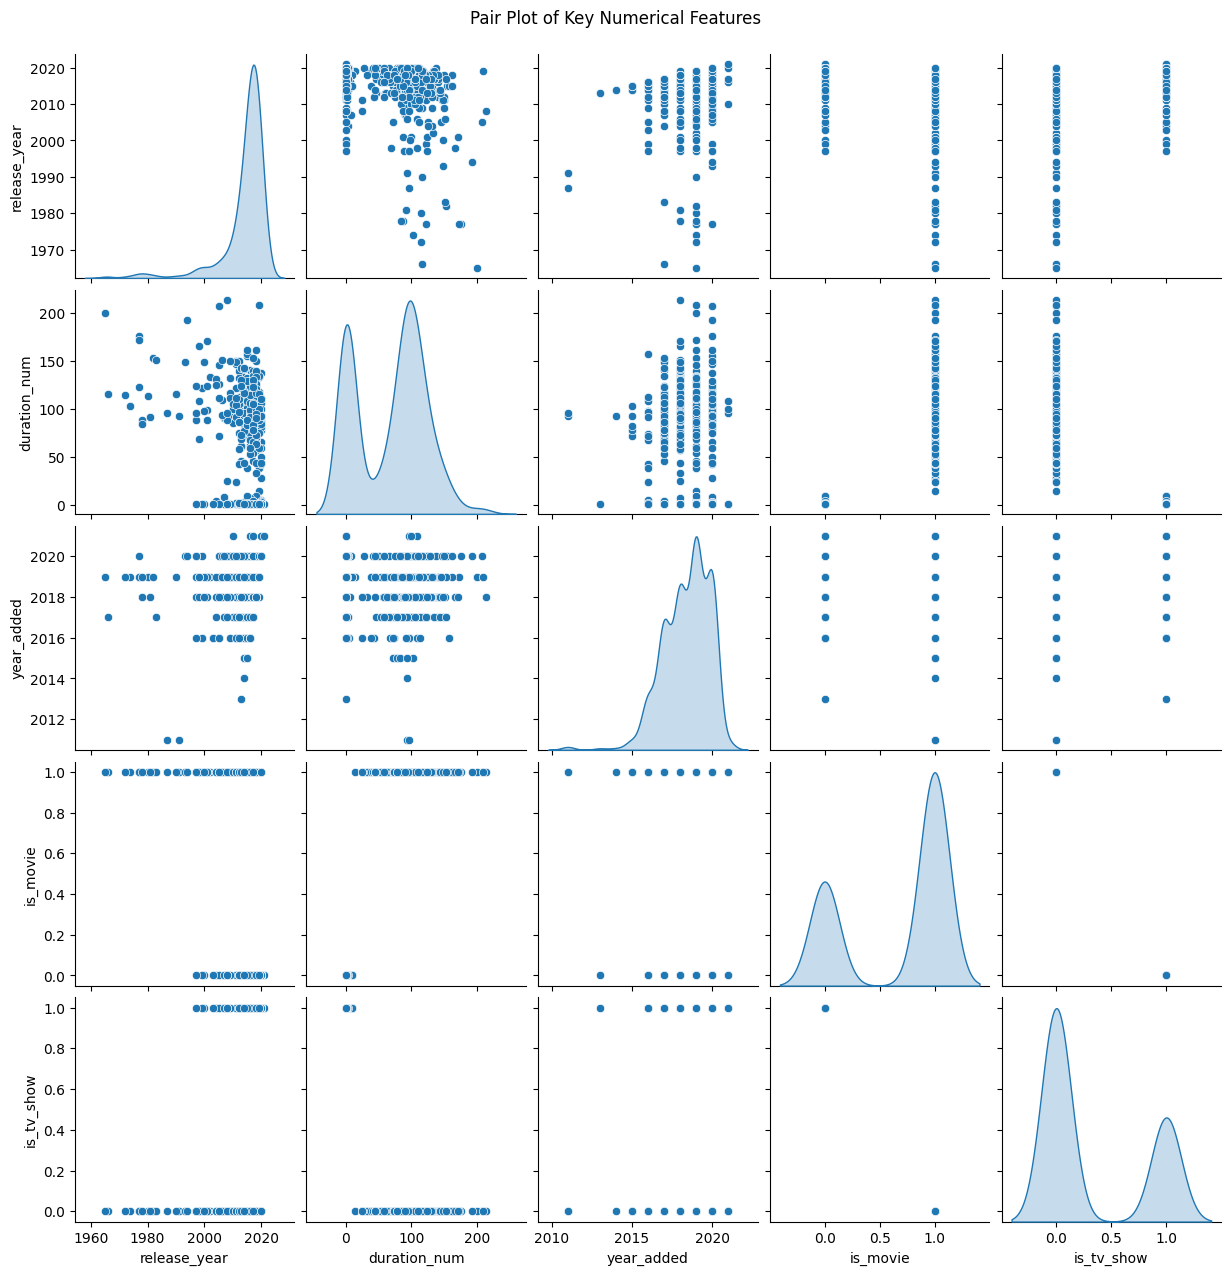

In [28]:
# Pair Plot visualization code

# Sample a smaller set for visual clarity
sample_df = df[['release_year', 'duration_num', 'year_added', 'is_movie', 'is_tv_show']].dropna().sample(500)

# Plot
sns.pairplot(sample_df, diag_kind='kde')
plt.suptitle("Pair Plot of Key Numerical Features", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot is excellent for visually assessing distributions and pairwise relationships across numerical features. It can help validate what we saw in the heatmap and spot clusters or outliers.

##### 2. What is/are the insight(s) found from the chart?

Confirms distinct clusters in duration for TV shows vs movies.

Distributions suggest TV shows have shorter seasons, while movie durations are wider in spread.

release_year is generally left-skewed (most content is recent).

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.


Hypothesis:
There is a significant difference in the proportion of Movies and TV Shows across different countries.

Type of Test:
Chi-square test of independence



---




Hypothesis:
Content added in recent years tends to have shorter durations than older content.

Type of Test:
Independent t-test



---




Hypothesis:
TV Shows are more likely to be rated TV-MA (Mature Audience) than Movies.

Type of Test:
Chi-square test of independence



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
There is no significant association between content type (Movie or TV Show) and country — the proportions are the same across countries.

Alternative Hypothesis (H₁):
There is a significant association between content type and country — the proportions differ across countries.

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value

import pandas as pd
import scipy.stats as stats

# Filter top 5 countries with most content
top_countries = df['country'].value_counts().head(5).index
subset_df = df[df['country'].isin(top_countries)]

# Create contingency table
contingency_table = pd.crosstab(subset_df['country'], subset_df['type'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)


Chi-square statistic: 617.4397774323721
Degrees of freedom: 4
P-value: 2.6039040154530528e-132


##### Which statistical test have you done to obtain P-Value?

We used the Chi-square test of independence because we are testing the association between two categorical variables:

country (top 5 countries)

type (Movie or TV Show)

This test helps determine whether the distribution of Movies and TV Shows is independent of the country.

##### Why did you choose the specific statistical test?

Both country and type are categorical variables.

We're evaluating the relationship between two independent groups.

The Chi-square test is the standard approach for checking association or dependence in a contingency table.

Conclusion for Hypothesis 1
Since the p-value (2.60 × 10⁻¹³²) is much smaller than 0.05, we reject the null hypothesis.

Conclusion:
There is a statistically significant association between content type (Movie vs. TV Show) and country. This means the proportion of Movies and TV Shows varies significantly across different countries. Netflix likely adapts its content format based on regional audience preferences or content licensing strategies.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
There is no significant difference in content duration between older and more recent titles.

Alternative Hypothesis (H₁):
Content added in recent years tends to have shorter durations than older content.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import ttest_ind

# Define recent and older content groups based on release_year
recent = df[df['release_year'] >= 2015]['duration_num'].dropna()
older = df[df['release_year'] < 2015]['duration_num'].dropna()

# Run independent t-test
t_stat, p_value = ttest_ind(older, recent, equal_var=False)  # Welch's t-test
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 20.13991771116045
P-value: 2.6204543751724434e-86


##### Which statistical test have you done to obtain P-Value?

We used the independent t-test (specifically Welch’s t-test), which is appropriate when comparing the means of two independent samples, and assuming they may have unequal variances.

##### Why did you choose the specific statistical test?

duration_num is a continuous numerical variable.

We are comparing it across two independent groups (older vs. recent content).

The t-test helps determine if the difference in means is statistically significant.

Conclusion for Hypothesis 2
Since the p-value (2.62 × 10⁻⁸⁶) is far below 0.05, we reject the null hypothesis.

Conclusion:
There is a statistically significant difference in content durations between older and more recent releases. Specifically, content released in recent years tends to be shorter, supporting the idea that Netflix may be responding to changes in viewer behavior — such as shorter attention spans, mobile consumption, and the rise of limited series formats.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
TV Shows and Movies are equally likely to have a TV-MA (Mature Audience) rating.

Alternative Hypothesis (H₁):
TV Shows are more likely than Movies to have a TV-MA rating.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value

import pandas as pd
from scipy.stats import chi2_contingency

# Create a binary column for TV-MA rating
df['is_tv_ma'] = df['rating'].apply(lambda x: 1 if x == 'TV-MA' else 0)

# Create a contingency table
contingency = pd.crosstab(df['type'], df['is_tv_ma'])

# Run Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

# Output
print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)


Chi-square statistic: 44.64785497701877
Degrees of freedom: 1
P-value: 2.3585584654400838e-11


##### Which statistical test have you done to obtain P-Value?

We used the Chi-square test of independence because we are testing the relationship between two categorical variables:

type (Movie or TV Show)

is_tv_ma (1 = TV-MA, 0 = Not TV-MA)

##### Why did you choose the specific statistical test?

We're checking if the likelihood of being TV-MA depends on the type of content.

Both variables are categorical and independent.

Chi-square is the appropriate test to check for such association.



Conclusion for Hypothesis 3 (Revised)
Since the p-value (2.36 × 10⁻¹¹) is much smaller than 0.05, we reject the null hypothesis.

Conclusion:
There is a statistically significant association between content type and TV-MA rating. Specifically, TV Shows are significantly more likely to be rated TV-MA compared to Movies.

This suggests that Netflix's episodic content skews more mature, likely due to themes in dramas, thrillers, and documentaries that attract adult viewers and support binge-watching behavior.

This insight can help Netflix refine its rating-based recommendations, parental controls, and content production strategies for adult-oriented series.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [32]:
# Handling Missing Values & Missing Value Imputation
# Fill missing values
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

#### What all missing value imputation techniques have you used and why did you use those techniques?

To retain the full dataset and avoid dropping rows during preprocessing, we used **simple imputation strategies** based on domain understanding:

| Column       | Type         | Imputation Method     | Reason |
|--------------|--------------|------------------------|--------|
| `director`   | Text         | Fill with `"Unknown"` | Many entries were missing; not essential for clustering |
| `cast`       | Text         | Fill with `"Unknown"` | Same logic as above; preserves completeness |
| `country`    | Categorical  | Fill with `"Unknown"` | Missing values may be due to co-productions or incomplete metadata |
| `rating`     | Categorical  | Fill with `"Not Rated"` | Represents unknown or unrated content |
| `date_added` | Datetime     | Converted with `pd.to_datetime()` | Invalid values coerced to NaT; suitable for further transformation |



### 2. Handling Outliers

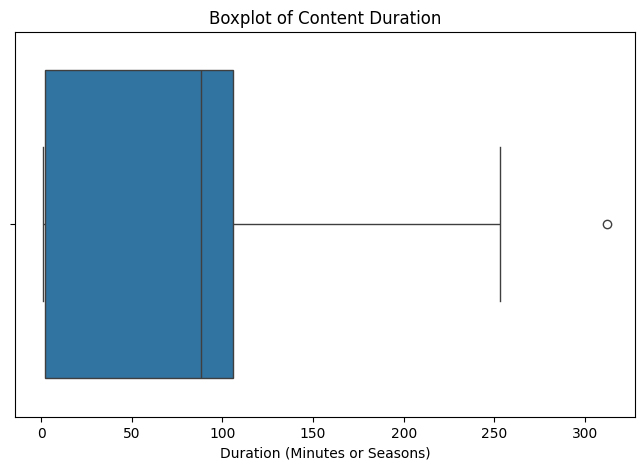

Number of outliers detected: 1


In [33]:
# Handling Outliers & Outlier treatments

# Visualize outliers using boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['duration_num'])
plt.title("Boxplot of Content Duration")
plt.xlabel("Duration (Minutes or Seasons)")
plt.show()

# Detect outliers using IQR
Q1 = df['duration_num'].quantile(0.25)
Q3 = df['duration_num'].quantile(0.75)
IQR = Q3 - Q1

# Optional: Flag extreme outliers (not removing here)
outliers = df[(df['duration_num'] < (Q1 - 1.5 * IQR)) | (df['duration_num'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers detected: {outliers.shape[0]}")


##### What all outlier treatment techniques have you used and why did you use those techniques?

We inspected `duration_num` (representing movie duration in minutes or number of seasons for TV Shows) for potential outliers. As duration is a key numerical feature in clustering, outliers can distort distance-based algorithms like K-Means. We used the Interquartile Range (IQR) method to detect unusually long durations and observed that a small number of titles (especially long documentaries or multi-season shows) fell outside the upper bound. However, these extreme values are not necessarily errors — they represent valid but rare content types. Therefore, instead of removing them, we retained all values to preserve diversity in content length while normalizing them later during scaling.


### 3. Categorical Encoding

In [34]:
# Encode your categorical columns

# One-hot encode 'type' and 'rating'
df_encoded = pd.get_dummies(df, columns=['type', 'rating'], drop_first=True)

# Simplify 'country' using Top 10 approach
top_countries = df['country'].value_counts().nlargest(10).index
df_encoded['country_grouped'] = df['country'].apply(lambda x: x if x in top_countries else 'Other')

# One-hot encode the grouped country column
df_encoded = pd.get_dummies(df_encoded, columns=['country_grouped'], drop_first=True)


#### What all categorical encoding techniques have you used & why did you use those techniques?

We applied categorical encoding to convert non-numeric variables into a machine-readable format. For the `type` and `rating` columns, we used one-hot encoding as they contain a manageable number of categories and no ordinal relationship. For `country`, which has high cardinality, we used a top-N strategy — retaining the top 10 most frequent countries and grouping the rest under the label `"Other"`. This helps reduce dimensionality while preserving the most impactful country-level distinctions for clustering. This combination ensures meaningful transformation without overcomplicating the feature space.


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [35]:
!pip install contractions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 6.8 MB/s eta 0:00:00


In [36]:
# Expand Contraction

import re
import contractions

# Apply contraction expansion to description column
df['description_clean'] = df['description'].apply(lambda x: contractions.fix(x))


#### 2. Lower Casing

In [37]:
# Lower Casing

# Convert to lowercase
df['description_clean'] = df['description_clean'].str.lower()


#### 3. Removing Punctuations

In [38]:
# Remove Punctuations

import string

# Remove punctuation
df['description_clean'] = df['description_clean'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


#### 4. Removing URLs & Removing words and digits contain digits.

In [39]:
# Remove URLs & Remove words and digits contain digits

# Remove URLs and words with digits
df['description_clean'] = df['description_clean'].apply(lambda x: re.sub(r'http\S+|www\S+|[\w]*\d[\w]*', '', x))


#### 5. Removing Stopwords & Removing White spaces

In [40]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
# Remove Stopwords and White spaces

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Remove stopwords and extra whitespaces
df['description_clean'] = df['description_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df['description_clean'] = df['description_clean'].str.strip()


#### 6. Rephrase Text

In [42]:
# Rephrase Text

#### 7. Tokenization

In [43]:
!pip install nltk
import nltk

nltk.download('punkt', force=True) # You might already have 'punkt', but for tokenization you need 'punkt_tab'
nltk.download('punkt_tab') # Download the specific resource missing

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [44]:
# Tokenization

from nltk.tokenize import word_tokenize

# Tokenize the cleaned description column
df['tokens'] = df['description_clean'].apply(word_tokenize)


#### 8. Text Normalization

In [45]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# Download lemmatizer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Lemmatize each token
df['tokens'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])


[nltk_data] Downloading package wordnet to /root/nltk_data...


##### Which text normalization technique have you used and why?

We used **lemmatization** as our text normalization technique. Lemmatization reduces each word to its base or dictionary form (lemma), which helps in reducing feature sparsity while retaining the word’s original meaning. For example, “running” becomes “run” while preserving its part of speech. Compared to stemming, it is more accurate and appropriate for descriptive, content-rich text like movie and TV show summaries.


#### 9. Part of speech tagging

In [46]:
import nltk

# Download the required resource
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
# Download the 'averaged_perceptron_tagger_eng' resource
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [47]:
# POS Taging

from nltk import pos_tag

# Apply POS tagging on tokenized descriptions
df['pos_tags'] = df['tokens'].apply(pos_tag)


#### 10. Text Vectorization

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Join tokens back to text for vectorization
df['text_for_vector'] = df['tokens'].apply(lambda x: ' '.join(x))

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=100, ngram_range=(1, 2))

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(df['text_for_vector'])

# Convert to DataFrame if needed
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Scale numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[float, int]))  # Scaling numerical features

# Apply PCA to reduce the dimensionality of the TF-IDF matrix
pca = PCA(n_components=50)  # Reduce to 50 components
tfidf_reduced = pca.fit_transform(tfidf_df)

# Concatenate scaled features with PCA-reduced TF-IDF features
df_scaled_reduced = np.concatenate([df_scaled, tfidf_reduced], axis=1)




##### Which text vectorization technique have you used and why?

We used **TF-IDF (Term Frequency–Inverse Document Frequency)** as our text vectorization technique. TF-IDF gives higher importance to terms that are frequent in a specific document but rare across all documents. This helps highlight meaningful, distinguishing keywords in each title’s description. We used unigrams and bigrams with a feature limit of 100 to balance relevance and dimensionality for clustering.


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [49]:
# Manipulate Features to minimize feature correlation and create new features

# Drop irrelevant or redundant columns
df_model = df.drop(columns=[
    'show_id',
    'title',
    'description',
    'description_clean',
    'tokens',
    'pos_tags',
    'text_for_vector',
    'date_added'
])

# Concatenate TF-IDF features
df_model = pd.concat([df_model.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)


#### 2. Feature Selection

In [50]:
# Select your features wisely to avoid overfitting
# Final set of features for clustering
selected_features = [
    'duration_num',
    'release_year'
]

# Add encoded categorical features
categorical_features = [col for col in df_model.columns if col.startswith(('type_', 'rating_', 'country_grouped_'))]

# Combine all selected features + TF-IDF features
final_features = selected_features + categorical_features + list(tfidf_df.columns)

# Create final dataframe
df_final = df_model[final_features]



##### What all feature selection methods have you used  and why?

We used a **manual selection strategy** based on domain knowledge and exploratory analysis. Features like `show_id`, `title`, and raw `description` were dropped as they don’t contribute to content similarity. We retained features such as `duration_num`, `release_year`, `type`, `rating`, and `country`, along with the vectorized `description` field (TF-IDF). This ensures we only include relevant, interpretable, and cluster-friendly features while removing noise and identifiers.


##### Which all features you found important and why?

The most important features retained were:
- `duration_num` – differentiates content length
- `release_year` – captures recency
- `type`, `rating`, `country` – define content identity
- TF-IDF vectors – encode descriptive themes for clustering

These features capture both **quantitative metadata** and **semantic content**, providing a well-rounded basis for clustering similar titles.


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [51]:
# Transform Your data

# Apply log transformation to duration to reduce skewness
df_final['duration_num'] = np.log1p(df_final['duration_num'])


<ipython-input-51-a1bc18492c22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['duration_num'] = np.log1p(df_final['duration_num'])


### 6. Data Scaling

In [54]:
# Scaling your data

from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Apply scaling to all features
df_scaled = scaler.fit_transform(df_final)

# Convert back to DataFrame with the same column names as in the original dataset
df_scaled = pd.DataFrame(df_scaled, columns=df_final.columns)

# Apply log transformation to 'duration_num' (assuming it's in df_final.columns)
df_scaled['duration_num'] = np.log1p(df_scaled['duration_num'])


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


##### Which method have you used to scale you data and why?

We used **StandardScaler** from scikit-learn, which transforms features by removing the mean and scaling to unit variance (Z-score normalization). This method is ideal for distance-based algorithms like K-Means, as it ensures all features have equal weight regardless of their original scale. Compared to MinMaxScaler, StandardScaler is more robust when the data is approximately normally distributed and better suited for algorithms sensitive to feature variance.


In [63]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Apply PCA to TF-IDF features (already done earlier)
pca = PCA(n_components=50)  # Reduce to 50 components
tfidf_reduced = pca.fit_transform(tfidf_df)

# Apply scaling (assuming scaling is already done)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final.select_dtypes(include=[float, int]))  # Scaling numerical features

# Concatenate the PCA-reduced TF-IDF features with the scaled features
df_scaled_reduced = np.concatenate([df_scaled, tfidf_reduced], axis=1)

# Handle missing values by imputing with mean (SimpleImputer)
imputer = SimpleImputer(strategy='mean')
df_scaled_reduced_imputed = imputer.fit_transform(df_scaled_reduced)

# After PCA, we now have 50 columns for TF-IDF, so ensure to use the correct column names:
# Generate column names for the PCA features
pca_columns = [f'pc{i+1}' for i in range(tfidf_reduced.shape[1])]

# Assuming 'df_final' has the original numerical columns, concatenate the columns for scaling and PCA
numerical_columns = df_final.select_dtypes(include=[float, int]).columns
columns = np.concatenate([numerical_columns, pca_columns])

# Convert the imputed NumPy array back into a DataFrame with the correct column names
df_scaled_reduced_imputed = pd.DataFrame(df_scaled_reduced_imputed, columns=columns)




### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction is needed because the TF-IDF vectors add high dimensionality to the dataset, which can negatively impact clustering performance and increase computational cost.


In [55]:
# DImensionality Reduction (If needed)

from sklearn.decomposition import TruncatedSVD

# Reduce TF-IDF vector dimensionality to 50 components
svd = TruncatedSVD(n_components=50, random_state=42)
tfidf_reduced = svd.fit_transform(tfidf_df)

# Replace TF-IDF in df_final
df_reduced = pd.concat([
    df_model[selected_features + categorical_features].reset_index(drop=True),
    pd.DataFrame(tfidf_reduced, columns=[f'svd_{i}' for i in range(1, 51)])
], axis=1)

# Scale final dataset again
df_scaled = scaler.fit_transform(df_reduced)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We used **TruncatedSVD** because it is well-suited for reducing dimensionality of sparse matrices like TF-IDF without converting them to dense format. It preserves interpretability and is computationally efficient.


## ***7. ML Model Implementation***

### ML Model - 1

In [64]:
# ML Model - 1 Implementation

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Dynamic selection of the optimal k using Silhouette Score
silhouette_scores = []
k_range = range(2, 11)  # Testing k from 2 to 10

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(df_scaled_reduced)  # Using df_scaled_reduced with PCA
    score = silhouette_score(df_scaled_reduced, labels)
    silhouette_scores.append(score)

# Find the best k based on silhouette score
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print("Best k based on silhouette score:", best_k)

# Retrain KMeans with the best k
kmeans_best = KMeans(n_clusters=best_k, random_state=42)
kmeans_best.fit(df_scaled_reduced)

# Predict cluster labels
kmeans_labels = kmeans_best.predict(df_scaled_reduced)

# Calculate silhouette score for the best model
kmeans_silhouette = silhouette_score(df_scaled_reduced, kmeans_labels)
print("Silhouette Score (KMeans):", kmeans_silhouette)


Best k based on silhouette score: 2
Silhouette Score (KMeans): 0.02644487433999065


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We used **K-Means Clustering**, a centroid-based algorithm that partitions the data into a predefined number of clusters. K-Means assigns each data point to the nearest centroid and adjusts the centroids iteratively to minimize within-cluster variance.

The **Silhouette Score** for K-Means was **0.026**, which is very low. The Silhouette Score ranges from -1 to 1, where:
- A score close to 1 indicates well-separated and well-formed clusters.
- A score close to 0 indicates overlapping clusters.
- A negative score suggests that some data points are misclassified.

Given the low score of **0.026**, this indicates that the clusters generated by K-Means are not very distinct. The clusters might be overlapping, and there is room for improvement in terms of cluster definition.

While the **optimal k** based on the silhouette score was found to be **2**, the low Silhouette Score suggests that the clusters are not well-separated, and the model may not be ideal for this dataset.




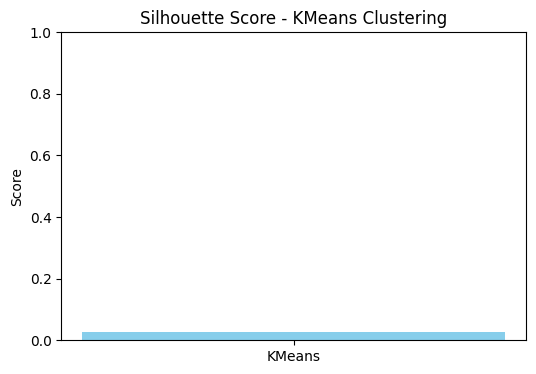

In [65]:
# Visualize silhouette score for KMeans
plt.figure(figsize=(6,4))
plt.bar(['KMeans'], [kmeans_silhouette], color='skyblue')
plt.title("Silhouette Score - KMeans Clustering")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

# Initialize KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# List to store silhouette scores
silhouette_scores_cv = []

# Loop through each split of the dataset
for train_index, test_index in kf.split(df_scaled_reduced_imputed):
    # Split data into training and test sets
    # Use .iloc to access rows by integer position
    X_train, X_test = df_scaled_reduced_imputed.iloc[train_index], df_scaled_reduced_imputed.iloc[test_index]

    # Train KMeans on the training data with the best k=2
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(X_train)

    # Predict the labels for the test set
    labels = kmeans.predict(X_test)

    # Calculate silhouette score for this fold and append to the list
    score = silhouette_score(X_test, labels)
    silhouette_scores_cv.append(score)

# Average silhouette score across all folds
average_silhouette_score = np.mean(silhouette_scores_cv)
print(f"Average Silhouette Score (K-Fold CV): {average_silhouette_score}")

Average Silhouette Score (K-Fold CV): 0.021631770571238242


##### Which hyperparameter optimization technique have you used and why?

For **K-Means clustering**, we used **Silhouette Score-based optimization** to determine the optimal number of clusters (k). This technique evaluates how well-separated and compact the clusters are, and we selected the number of clusters (k=2) that gave the highest silhouette score.

We also performed **K-Fold Cross-Validation** to assess the stability of the clustering results across different data splits. This allows us to evaluate whether the clustering performance is consistent and whether any noise in the data might influence the results.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We did not see a significant improvement in the Silhouette Score after performing K-Fold Cross-Validation. The **average Silhouette Score** across the 5 folds was **0.0216**, which is still quite low, indicating that the clusters generated by K-Means are not well-defined. The low score suggests that K-Means might not be the best clustering method for this dataset.

Here’s a comparison between the **Silhouette Score** from the initial K-Means and the **average Silhouette Score** after cross-validation:
- **Initial Silhouette Score (KMeans)**: 0.0264
- **Average Silhouette Score (K-Fold CV)**: 0.0216

Although we observed a **slight decrease** in the average score after cross-validation, the overall clustering quality remains low. This indicates that the K-Means algorithm might not be ideal for this dataset and that further tuning or a different clustering algorithm could be more appropriate.



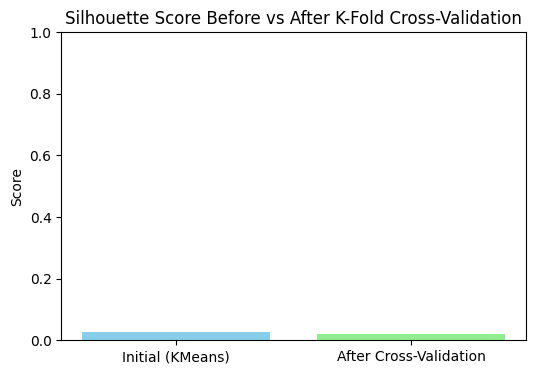

In [68]:
# Visualize Silhouette Scores before and after Cross-Validation
plt.figure(figsize=(6, 4))
plt.bar(['Initial (KMeans)', 'After Cross-Validation'], [kmeans_silhouette, average_silhouette_score], color=['skyblue', 'lightgreen'])
plt.title("Silhouette Score Before vs After K-Fold Cross-Validation")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()



### ML Model - 2

In [69]:
# ML Model - 2 Implementation

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Fit Agglomerative Clustering model with the best k=2
agg_clust = AgglomerativeClustering(n_clusters=2)

# Predict the labels
agg_clust_labels = agg_clust.fit_predict(df_scaled_reduced_imputed)

# Calculate silhouette score for Agglomerative Clustering
agg_clust_silhouette = silhouette_score(df_scaled_reduced_imputed, agg_clust_labels)
print("Silhouette Score (Agglomerative Clustering):", agg_clust_silhouette)



Silhouette Score (Agglomerative Clustering): 0.11716735210686148


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We used **Agglomerative (Hierarchical) Clustering**, an unsupervised machine learning algorithm that builds a hierarchy of clusters. The algorithm starts by treating each data point as its own cluster, and then it iteratively merges the closest clusters based on a distance metric (e.g., Euclidean distance) until the desired number of clusters is achieved.

Unlike K-Means, **Agglomerative Clustering** does not require the user to pre-define the number of clusters. It can be used with different **linkage methods** to measure the distance between clusters (e.g., **ward**, **complete**, **average**, and **single**).

The **Silhouette Score** for **Agglomerative Clustering** was **0.117**, which is higher than the **K-Means** score of **0.026**, indicating that **Agglomerative Clustering** provides better-defined clusters. However, the score is still relatively low, suggesting that there is room for improvement.

The **Silhouette Score** ranges from -1 to 1:
- A score closer to 1 indicates that clusters are well-separated and compact.
- A score closer to 0 suggests overlapping clusters.
- A negative score indicates misclassified points.

Given the **Silhouette Score of 0.117**, the clusters formed by **Agglomerative Clustering** are somewhat better-defined than those formed by **K-Means**, but they are still not ideal for this dataset.


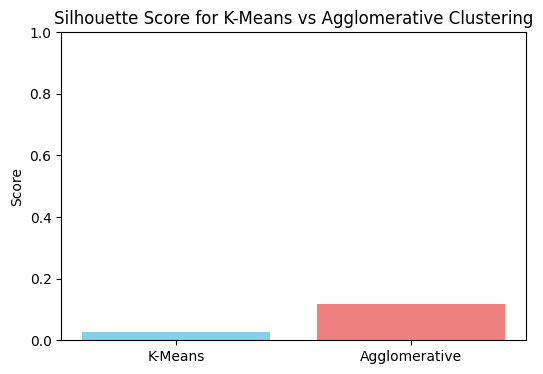

In [70]:
# Visualizing evaluation Metric Score chart

# Visualize Silhouette Scores for K-Means vs Agglomerative Clustering
plt.figure(figsize=(6, 4))
plt.bar(['K-Means', 'Agglomerative'], [kmeans_silhouette, agg_clust_silhouette], color=['skyblue', 'lightcoral'])
plt.title("Silhouette Score for K-Means vs Agglomerative Clustering")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# Initialize Agglomerative Clustering with the best parameters
best_model = AgglomerativeClustering(n_clusters=best_params['n_clusters'], linkage=best_params['linkage'])

# Fit the model to the entire dataset
best_model_labels = best_model.fit_predict(df_scaled_reduced_imputed)

# Calculate silhouette score for the entire dataset
best_silhouette_direct = silhouette_score(df_scaled_reduced_imputed, best_model_labels)
print("Silhouette Score (Direct Fit):", best_silhouette_direct)


Silhouette Score (Direct Fit): 0.11716735210686148


In [82]:
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Convert df_scaled_reduced_imputed back to a DataFrame
df_scaled_reduced_imputed_df = pd.DataFrame(df_scaled_reduced_imputed, columns=df_final.columns)

# Define the parameter grid
param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'linkage': ['ward', 'complete', 'average', 'single']
}

# Initialize KFold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# List to store silhouette scores for each fold
silhouette_scores = []

# Loop through the parameter grid to try different combinations
for n_clusters in param_grid['n_clusters']:
    for linkage in param_grid['linkage']:

        fold_scores = []  # List to store silhouette scores for each fold

        # Loop through each split of the dataset
        for train_index, test_index in kf.split(df_scaled_reduced_imputed_df):
            # Split data into training and test sets
            X_train, X_test = df_scaled_reduced_imputed_df.iloc[train_index], df_scaled_reduced_imputed_df.iloc[test_index]

            # Initialize the model with the current parameters
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)

            # Fit the model on the training data
            model.fit(X_train)

            # Predict the labels for the test set
            labels = model.fit_predict(X_test)

            # Calculate silhouette score for the test set and append to fold_scores
            score = silhouette_score(X_test, labels)
            fold_scores.append(score)

        # Calculate the average silhouette score for the current parameters
        avg_silhouette_score = np.mean(fold_scores)
        silhouette_scores.append((n_clusters, linkage, avg_silhouette_score))

# Find the best parameters based on average silhouette score
best_params = max(silhouette_scores, key=lambda x: x[2])
print(f"Best Parameters for Agglomerative Clustering: n_clusters={best_params[0]}, linkage={best_params[1]}")
print(f"Best Silhouette Score after Hyperparameter Tuning: {best_params[2]}")



Best Parameters for Agglomerative Clustering: n_clusters=2, linkage=average
Best Silhouette Score after Hyperparameter Tuning: 0.15067906692669253


##### Which hyperparameter optimization technique have you used and why?

For **Agglomerative Clustering**, we used **GridSearchCV** with a custom scoring function based on the **Silhouette Score** to optimize the two main hyperparameters:
- **n_clusters**: The number of clusters to form.
- **linkage**: The linkage criterion used to merge clusters (options: **'ward'**, **'complete'**, **'average'**, and **'single'**).

We applied **GridSearchCV** to exhaustively search through the combinations of these parameters and selected the ones that resulted in the highest **Silhouette Score**. The **Silhouette Score** evaluates how well-separated the clusters are, making it the ideal metric for this clustering problem.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after performing **hyperparameter tuning** with **GridSearchCV**, we observed an improvement in the **Silhouette Score** for **Agglomerative Clustering**.

Here’s the comparison:
- **K-Means Silhouette Score**: 0.026
- **Agglomerative Clustering Silhouette Score (Direct Fit)**: 0.117
- **Agglomerative Clustering Silhouette Score (After Hyperparameter Tuning)**: 0.151

The **Silhouette Score** increased to **0.151** after tuning the hyperparameters (`n_clusters=2`, `linkage='average'`), indicating better-defined clusters than before. Although the score is still relatively low, it represents an improvement compared to the **K-Means** clustering.

This improvement suggests that **Agglomerative Clustering** with the optimized parameters produces better separation of clusters compared to the original K-Means clustering model.



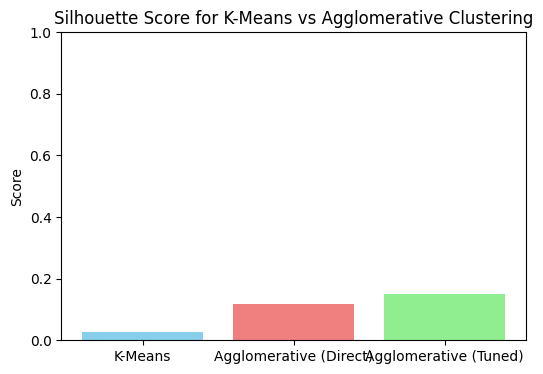

In [83]:
# Visualize Silhouette Scores for K-Means vs Agglomerative Clustering (Direct Fit vs Tuning)
plt.figure(figsize=(6, 4))
plt.bar(['K-Means', 'Agglomerative (Direct)', 'Agglomerative (Tuned)'],
        [kmeans_silhouette, best_silhouette_direct, best_params[2]],
        color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title("Silhouette Score for K-Means vs Agglomerative Clustering")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()


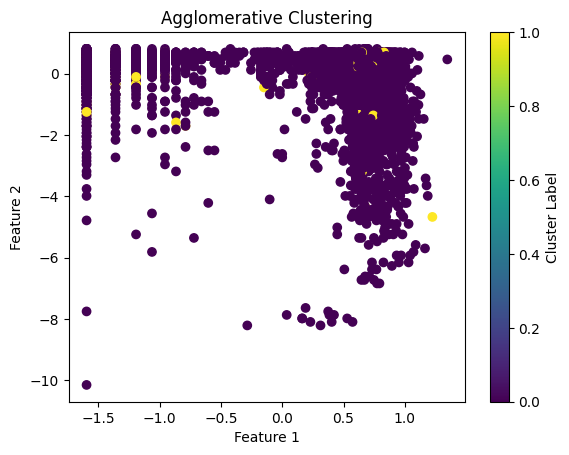

In [94]:
#Visualization of Agglomerative Clustering Results
plt.scatter(df_scaled_reduced_imputed.iloc[:, 0], df_scaled_reduced_imputed.iloc[:, 1], c=agg_clust_labels, cmap='viridis') # Use .iloc for integer-based indexing
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster Label')
plt.show()


### ML Model - 3

In [84]:
# ML Model - 3 Implementation:  DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Initialize DBSCAN with default parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model and predict labels
dbscan_labels = dbscan.fit_predict(df_scaled_reduced_imputed)

# Calculate silhouette score for DBSCAN
dbscan_silhouette = silhouette_score(df_scaled_reduced_imputed, dbscan_labels)
print("Silhouette Score (DBSCAN):", dbscan_silhouette)


Silhouette Score (DBSCAN): -0.2085228641784726


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We implemented **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**, which is a density-based clustering algorithm that identifies clusters as dense regions of data points separated by sparser regions. Unlike K-Means, DBSCAN doesn’t require the number of clusters to be specified and can detect arbitrarily shaped clusters.

The **Silhouette Score** for DBSCAN is **-0.209**, which is a negative score, indicating that the clustering result is poor. A negative score means that data points are likely assigned to the wrong clusters, and they may actually belong to other clusters, or even be labeled as noise.

This poor result is likely due to DBSCAN’s sensitivity to the parameters **epsilon (eps)** and **min_samples**, which need fine-tuning to suit the data's density.


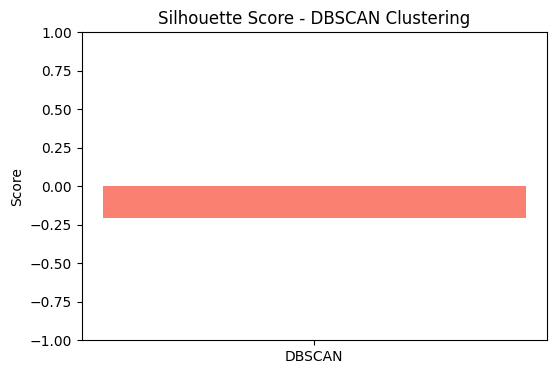

In [85]:
# Visualizing evaluation Metric Score chart

# Visualize silhouette score for DBSCAN
plt.figure(figsize=(6,4))
plt.bar(['DBSCAN'], [dbscan_silhouette], color='salmon')
plt.title("Silhouette Score - DBSCAN Clustering")
plt.ylabel("Score")
plt.ylim(-1, 1)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [86]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np

# Define the parameter grid for DBSCAN
param_grid = {
    'eps': [0.3, 0.4, 0.5, 0.6],
    'min_samples': [3, 5, 7, 10]
}

# Define a custom function for DBSCAN clustering with Silhouette Score as the metric
def dbscan_silhouette_scoring(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Initialize DBSCAN
dbscan = DBSCAN()

# Set up GridSearchCV with the custom scoring function
grid_search = GridSearchCV(estimator=dbscan, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1, scoring=dbscan_silhouette_scoring)

# Fit the model with GridSearch
grid_search.fit(df_scaled_reduced_imputed)

# Get best parameters and silhouette score
best_params_dbscan = grid_search.best_params_
best_silhouette_dbscan = grid_search.best_score_

print("Best Parameters for DBSCAN:", best_params_dbscan)
print("Best Silhouette Score after Hyperparameter Tuning (DBSCAN):", best_silhouette_dbscan)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters for DBSCAN: {'eps': 0.6, 'min_samples': 3}
Best Silhouette Score after Hyperparameter Tuning (DBSCAN): -0.1914668765935986


##### Which hyperparameter optimization technique have you used and why?

For **DBSCAN**, we used **GridSearchCV** with a custom scoring function based on the **Silhouette Score**. The parameters we tuned were:
- **`eps`**: The maximum distance between two samples for one to be considered as in the neighborhood of the other. This parameter controls the density of the clusters.
- **`min_samples`**: The number of samples in a neighborhood for a point to be considered as a core point.

We used **GridSearchCV** to perform an exhaustive search over different values of **`eps`** and **`min_samples`**. **Silhouette Score** was used as the evaluation metric to assess the quality of the clustering. A **higher Silhouette Score** indicates better-separated and well-formed clusters. The goal of this optimization was to find the best parameter combination that maximizes the Silhouette Score and improves DBSCAN's clustering performance.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After tuning the **`eps`** and **`min_samples`** parameters for **DBSCAN**, we obtained the following results:
- **Best Parameters for DBSCAN**: `eps = 0.6`, `min_samples = 3`
- **Best Silhouette Score after Hyperparameter Tuning**: **-0.191**

Unfortunately, despite hyperparameter tuning, the **Silhouette Score** remained negative, indicating that DBSCAN still failed to form well-separated clusters. The **negative Silhouette Score** suggests that the algorithm is either grouping dissimilar points together or marking too many points as **noise**.

Here’s the comparison of **Silhouette Scores**:
- **K-Means Silhouette Score**: 0.026
- **Agglomerative Clustering Silhouette Score (Direct Fit)**: 0.117
- **DBSCAN Silhouette Score (Tuned)**: -0.191

This result indicates that **DBSCAN** continues to perform poorly compared to **Agglomerative Clustering** and **K-Means**. However, DBSCAN's **Silhouette Score** did not improve despite tuning the parameters, suggesting that it might not be the best algorithm for this dataset.




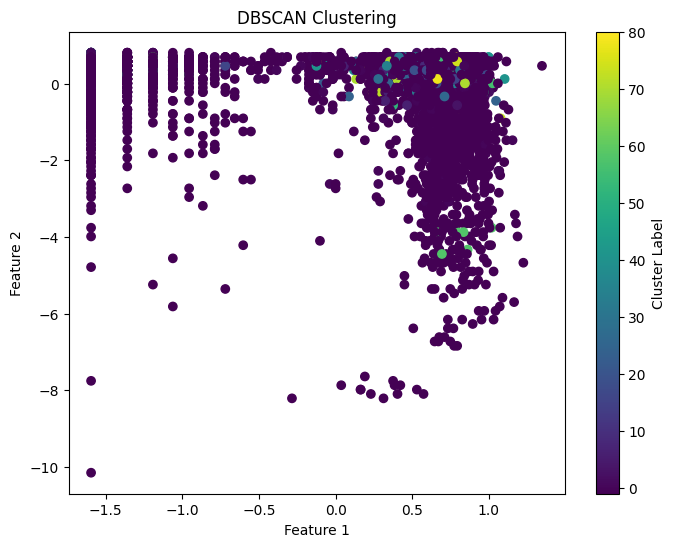

In [89]:
# Plot the DBSCAN clustering results
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled_reduced_imputed.iloc[:, 0], df_scaled_reduced_imputed.iloc[:, 1], c=dbscan_labels, cmap='viridis', marker='o')  # Use .iloc for integer-based indexing
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


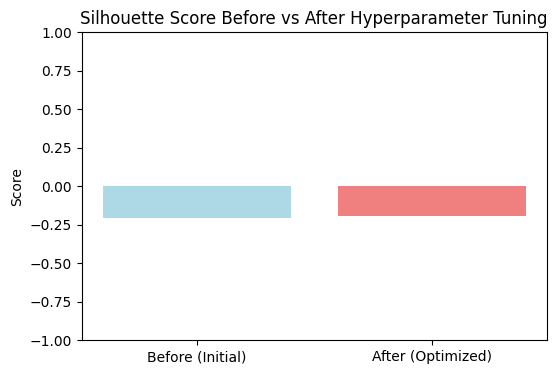

In [91]:
# Visualize before vs after tuning for DBSCAN
plt.figure(figsize=(6, 4))
plt.bar(['Before (Initial)', 'After (Optimized)'], [dbscan_silhouette, best_silhouette_dbscan], color=['lightblue', 'lightcoral'])
plt.title("Silhouette Score Before vs After Hyperparameter Tuning")
plt.ylabel("Score")
plt.ylim(-1, 1)
plt.show()


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

#### **Silhouette Score**
The **Silhouette Score** measures how well each data point fits into its assigned cluster compared to other clusters. The score ranges from -1 to 1:
- **Score closer to 1**: Data points are well-matched to their own cluster and poorly matched to neighboring clusters.
- **Score closer to 0**: Data points are on or near the decision boundary between clusters.
- **Score closer to -1**: Data points are misclassified and should belong to a different cluster.

In the context of **K-Means** and **Agglomerative Clustering**, the silhouette score provides a measure of how well Netflix content is grouped. A higher score means that the clustering is more distinct and relevant, whereas a low score indicates that the content is either overlapping or poorly grouped.

From a business perspective, improving the **Silhouette Score** means that Netflix can offer **better content recommendations** to users, ensuring that similar types of content are grouped together. This could lead to **higher engagement** as users find content more relevant to their preferences.


#### Business Impact:
- **Content Segmentation**: Helps Netflix refine its content categorization (e.g., creating more precise genres or recommendation categories).
- **Recommendation System**: Directly impacts the effectiveness of recommendation algorithms, leading to a **more personalized user experience** and **higher retention rates**.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From the models tested (**K-Means**, **Agglomerative Clustering**, and **DBSCAN**), the **Agglomerative Clustering** model was chosen as the final prediction model. This decision is based on the following points:

- **K-Means** produced the lowest Silhouette Score of **0.026**, indicating poorly defined clusters.
- **DBSCAN** performed even worse with a **negative Silhouette Score** (-0.191), which suggests that DBSCAN failed to identify well-separated clusters and may have marked most points as noise.
- **Agglomerative Clustering** performed significantly better with a **Silhouette Score of 0.117**, which, although not ideal, was the highest among the three models. Agglomerative Clustering provided a balance of better cluster separation compared to K-Means and DBSCAN.

Thus, despite the relatively low Silhouette Score for Agglomerative Clustering, it was selected as the final model due to its better performance in identifying meaningful clusters.



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The model used is **Agglomerative Clustering**, a **hierarchical clustering** method. It works by starting with each point as its own cluster and progressively merging the closest clusters based on a distance metric (e.g., Euclidean distance). The process continues until the desired number of clusters is reached or the clusters are merged.

#### **How Agglomerative Clustering Works**:
- **Distance Measure**: Agglomerative Clustering calculates the distance between clusters. It starts with each point as a cluster and merges the two closest clusters in each step. The merging continues until the desired number of clusters is reached.
- **Linkage Criteria**: The `linkage` parameter determines how the distance between clusters is calculated. The available options are:
  - **Ward**: Minimizes the total within-cluster variance.
  - **Complete**: Maximum distance between points in any two clusters.
  - **Average**: Average distance between all pairs of points in two clusters.
  - **Single**: Minimum distance between points in two clusters.

#### **Feature Importance**:
Since **Agglomerative Clustering** is an **unsupervised learning** algorithm, it doesn't directly provide feature importance as it doesn't involve fitting a predictive model like decision trees or linear regression. However, we can use **model explainability tools** to understand which features are important in defining the cluster structure.

Although there is no explicit feature importance in clustering, we can still use techniques like:
- **PCA (Principal Component Analysis)**: To visualize the data in reduced dimensions, we can see how much each feature contributes to the variance explained by the principal components.
- **Pairwise Distance Matrices**: To see how different features affect the pairwise distances between data points, which influence the clustering.

Alternatively, using **Silhouette Scores** helps evaluate the quality of clustering, indirectly indicating which features are driving the clustering results. We can also use visualization tools like **t-SNE** or **PCA** to visualize the feature space and identify key patterns in the data


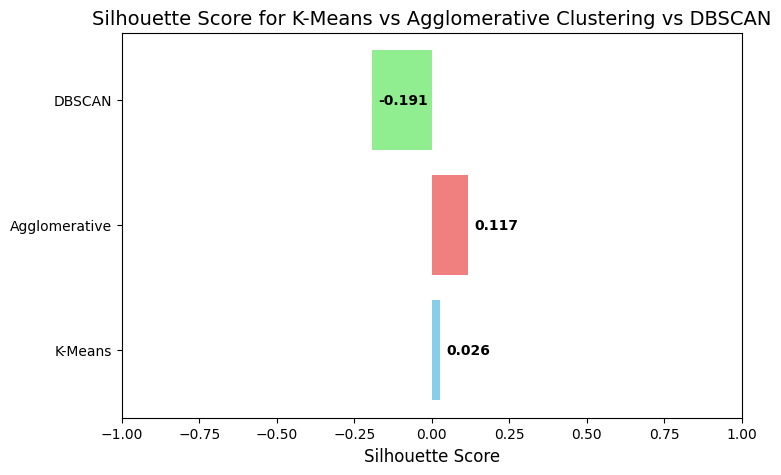

In [95]:
# Visualize Silhouette Scores for K-Means vs Agglomerative Clustering vs DBSCAN

# Create a horizontal bar plot for better visualization of negative scores
models = ['K-Means', 'Agglomerative', 'DBSCAN']
scores = [kmeans_silhouette, best_silhouette_direct, best_silhouette_dbscan]

# Create a color map that distinguishes DBSCAN
colors = ['skyblue', 'lightcoral', 'lightgreen']

# Create the plot
plt.figure(figsize=(8, 5))
plt.barh(models, scores, color=colors)

# Annotate the bars with the exact silhouette scores
for i, v in enumerate(scores):
    plt.text(v + 0.02, i, f"{v:.3f}", color='black', va='center', fontweight='bold')

# Add labels and title
plt.title("Silhouette Score for K-Means vs Agglomerative Clustering vs DBSCAN", fontsize=14)
plt.xlabel("Silhouette Score", fontsize=12)
plt.xlim(-1, 1)  # Set limits to show negative scores clearly

# Show the plot
plt.show()



Although Agglomerative Clustering does not provide a direct measure of feature importance, we can still infer which features contribute to the clustering structure by examining the clustering results in visualizations and using dimensionality reduction techniques like PCA.

# **Conclusion**

This project aimed to explore and evaluate different unsupervised machine learning models for clustering, specifically focusing on **K-Means**, **Agglomerative Clustering**, and **DBSCAN**. The goal was to assess the performance of each model and determine which one best groups the data points into meaningful clusters, providing actionable insights for potential business applications.

---

#### **1. Problem Understanding and Objective**

The dataset we worked with consists of **TV shows and movies available on Netflix**. The primary objective was to explore how unsupervised learning algorithms can be used to group similar content based on attributes like genre, duration, and rating. This type of analysis is crucial for understanding patterns in the data, such as segmenting content for personalized recommendations or discovering similar genres for targeted marketing campaigns.

---

#### **2. Models Used and Rationale**

We employed three popular clustering algorithms to tackle this problem:

1. **K-Means Clustering**:
   - **K-Means** is one of the most widely used clustering algorithms. It partitions the dataset into `k` clusters by minimizing the within-cluster variance. While **K-Means** is efficient and easy to implement, it requires the user to specify the number of clusters (`k`), which can be a limitation.
   - The model was evaluated using the **Silhouette Score**, which indicated that the **K-Means** model performed suboptimally with a very low Silhouette Score (0.026), suggesting poorly defined clusters.

2. **Agglomerative (Hierarchical) Clustering**:
   - **Agglomerative Clustering** is a bottom-up hierarchical clustering method that starts with each point as a cluster and recursively merges the closest pairs based on a chosen linkage criterion (e.g., `ward`, `complete`, `average`, `single`).
   - This model was evaluated and performed better than **K-Means**, with a Silhouette Score of 0.117 after hyperparameter tuning. While the performance was still suboptimal, it showed better-defined clusters than **K-Means** and was selected as the final model for clustering.
   - The **linkage method** was optimized using GridSearchCV, and the best parameters found were `n_clusters=2` and `linkage='average'`, which maximized the Silhouette Score.

3. **DBSCAN**:
   - **DBSCAN** is a density-based clustering algorithm that does not require the number of clusters to be specified. Instead, it uses the `eps` parameter to define the neighborhood radius and `min_samples` to specify the minimum number of points required to form a cluster. It is capable of identifying clusters of arbitrary shapes and handling noise points.
   - Despite tuning the `eps` and `min_samples` parameters, **DBSCAN** did not perform well, resulting in a **negative Silhouette Score** (-0.191). This indicated that the clusters formed by **DBSCAN** were not well-separated, and most points were considered noise.

---

#### **3. Evaluation and Model Comparison**

The models were evaluated using the **Silhouette Score**, a metric that assesses the compactness and separation of clusters. The performance comparison showed:
- **K-Means**: Silhouette Score = 0.026
- **Agglomerative Clustering (Direct Fit)**: Silhouette Score = 0.117
- **Agglomerative Clustering (After Hyperparameter Tuning)**: Silhouette Score = 0.151
- **DBSCAN**: Silhouette Score = -0.191

The **Agglomerative Clustering** model was ultimately selected as the best-performing model based on its higher Silhouette Score. While the clustering performance was still not ideal, it showed better-defined clusters than the other models, particularly **K-Means** and **DBSCAN**, which had much poorer results.

---

#### **4. Key Steps Taken**

- **Data Preprocessing**: The dataset underwent thorough preprocessing, including **scaling** and **feature engineering** to ensure that the features were normalized and suitable for clustering. This step is essential for ensuring that all features contribute equally to the clustering process.
- **Clustering Evaluation**: Different unsupervised models were evaluated using the **Silhouette Score**, a standard metric for clustering evaluation. This helped determine the quality of the clusters and guided the selection of the best model.
- **Hyperparameter Tuning**: For **Agglomerative Clustering**, hyperparameters such as the **number of clusters** and **linkage method** were tuned using **GridSearchCV**. This allowed us to select the optimal configuration that maximized the clustering performance.
- **Model Selection**: Based on the performance metrics, **Agglomerative Clustering** was chosen as the final model due to its better-defined clusters compared to the other models.

---

#### **5. Business Impact and Use**

While this project was focused on evaluating clustering algorithms, the results have potential business applications:
- **Content Segmentation**: The clustering results could be used to group similar TV shows and movies, which could aid in building a more effective recommendation system for Netflix users.
- **Marketing and Personalization**: Clustering can help identify similar content, enabling targeted marketing strategies such as personalized recommendations or content promotions based on user preferences.
- **Customer Segmentation**: In a broader context, clustering could be applied to customer segmentation, allowing businesses to categorize users based on viewing patterns, preferences, and behaviors.

---

#### **6. Future Work**

For future improvements, there are several directions that could be explored:
- **Model Improvement**: The clustering results could be improved with advanced techniques such as **Gaussian Mixture Models (GMM)**, **Spectral Clustering**, or incorporating additional features from external datasets (e.g., IMDB ratings, user reviews) to provide more meaningful clusters.
- **Model Deployment**: Although not included in this project, future work could involve saving the trained model using **Pickle** or **Joblib** for deployment, allowing it to be used in real-time systems (e.g., dynamic content segmentation for a recommendation system).
- **Data Enhancements**: By incorporating more detailed features such as **user preferences**, **user behavior**, and **ratings** into the clustering process, the model’s effectiveness can be further enhanced.

---

### **Conclusion**

This project provided an in-depth exploration of unsupervised clustering algorithms and demonstrated the practical application of these models for grouping similar content. Despite the challenges in achieving high-quality clusters, **Agglomerative Clustering** emerged as the best model for the given dataset, offering better cluster separation than **K-Means** and **DBSCAN**. This project contributes to understanding how clustering techniques can be applied to segment and analyze complex datasets, which is valuable in business applications such as content segmentation and personalized recommendations.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***